# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-for-pred/data_for_predictions.csv


---
## 2. Load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [3]:
filepath = '/kaggle/input/data-for-pred/data_for_predictions.csv'
df = pd.read_csv(filepath)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal  \
0                    40.606701  ...                  2               6   
1                    44.311378  ...                 76               4   
2                    44.311378  ...                 68               8   
3                    44.311378  ...                 69               9   
4                    40.606701  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 63 columns]

> Dividing the feautres into num_list, discrete_list, cat_list

In [4]:
feature = df.drop(columns=['id','churn'])
num_list = feature.dtypes.index[feature.dtypes.values =='float64'].tolist()
# numlist
other = feature.dtypes.index[feature.dtypes.values !='float64'].tolist()
other  
discrete_list = ['nb_prod_act', 'tenure','months_activ',
 'months_to_end',
 'months_modif_prod',
 'months_renewal']
cat_list = [i for i in other if i not in discrete_list]
cat_list

['has_gas',
 'channel_MISSING',
 'channel_ewpakwlliwisiwduibdlfmalxowmwpci',
 'channel_foosdfpfkusacimwkcsosbicdxkicaua',
 'channel_lmkebamcaaclubfxadlmueccxoimlema',
 'channel_usilxuppasemubllopkaafesmlibmsdf',
 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
 'origin_up_ldkssxwpmemidmecebumciepifcamkci',
 'origin_up_lxidpiddsbxsbosboudacockeimpuepw']

In [5]:
correlation = df.corr(numeric_only=True)
print(correlation['churn'].sort_values(ascending=False))

churn                                         1.000000
margin_net_pow_ele                            0.095772
margin_gross_pow_ele                          0.095725
origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.094131
channel_foosdfpfkusacimwkcsosbicdxkicaua      0.075964
                                                ...   
months_modif_prod                            -0.052120
channel_lmkebamcaaclubfxadlmueccxoimlema     -0.052946
tenure                                       -0.072409
months_activ                                 -0.074797
origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws   -0.080766
Name: churn, Length: 62, dtype: float64


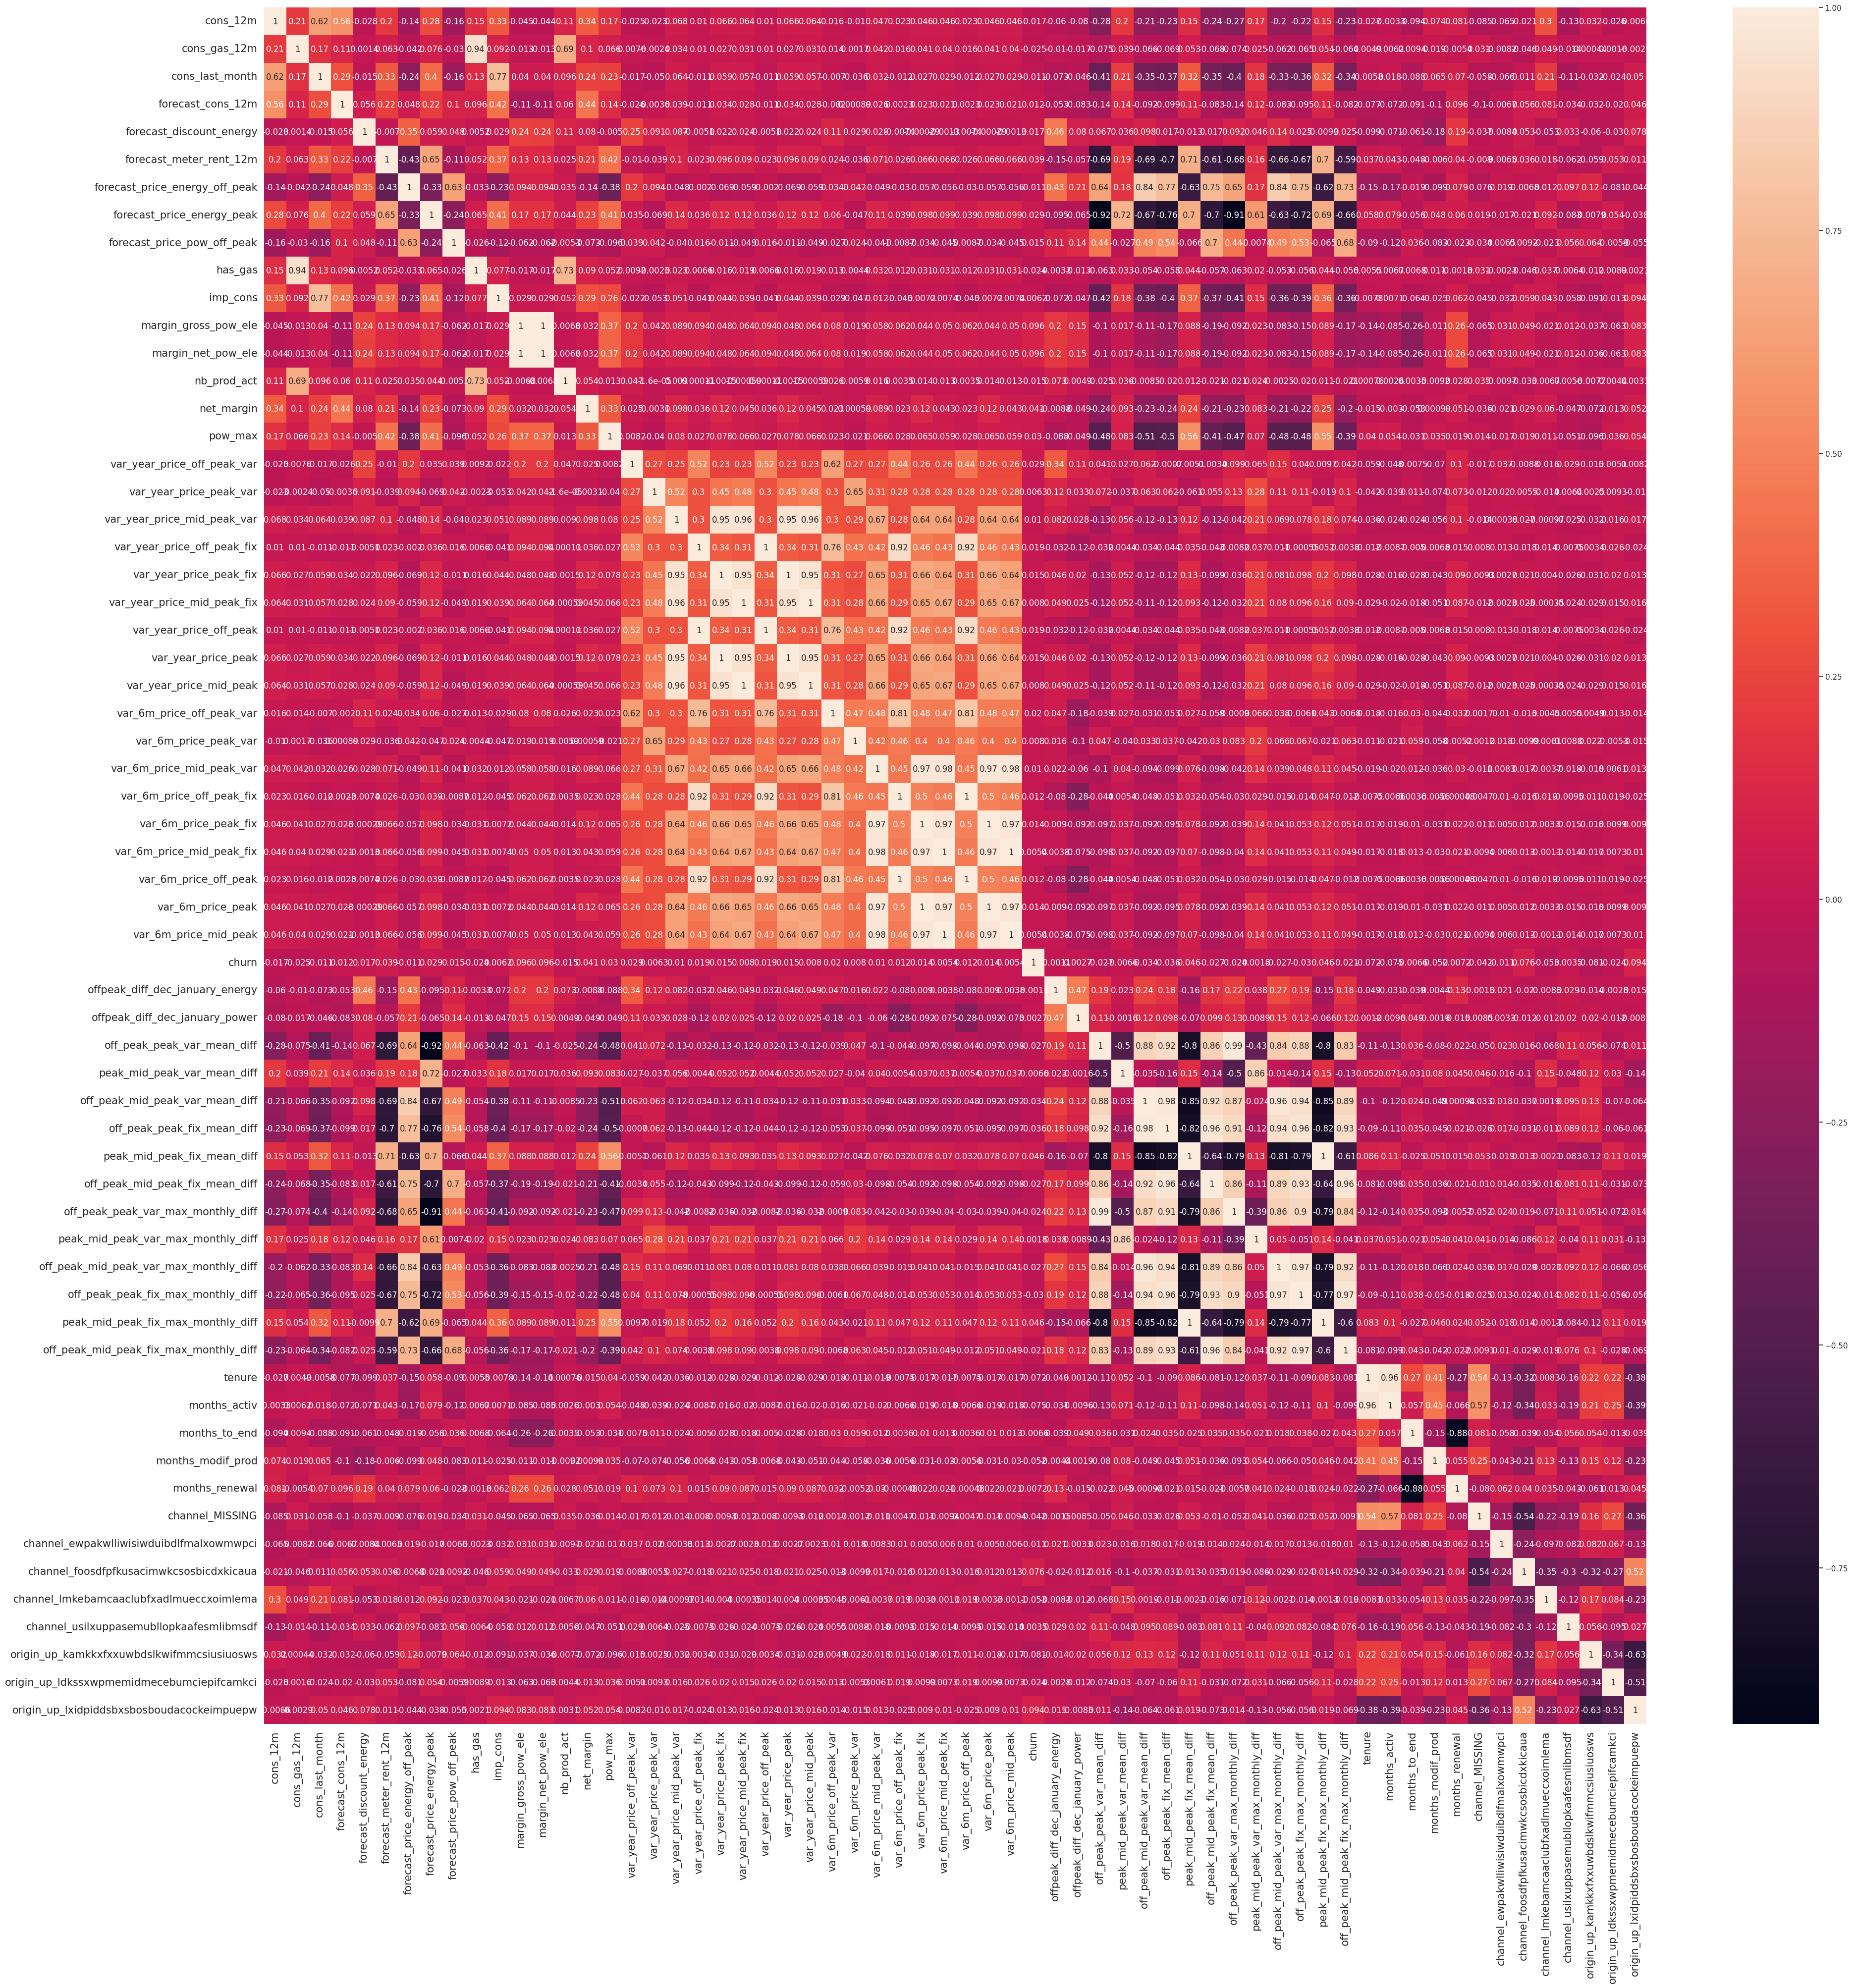

In [6]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [7]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, precision_score, recall_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import matplotlib.pyplot as plt

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [8]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

### Prediction 

***Firstly,*** since the dataset has an huge imbalance between the class of chunred vs retained (10/90), which is going to make the model not sensitivy to the minority class ***the churned class*** since it has much more data of the retained-class to learn from as well as the distribution imbalance means if the model's goal is to get the most guesses correct, it would prioritize guessing retained since even with 100% guesses being retained ( churn == 0 ) the accuracy would be at around 90%, there fore accuracy will not be a sufficient indicator of the model's preformance at indentifying churn=ed customer 

**solution**: we would have to use one or many of the technique of addresing imbalance :
- model-level technique of adding weight to the miniority class to have the model be more sensitive to the minority class or 
- use a data preprocessing technique of undersamplingoversampling to have more balanced classes or oversampling with SMOTE 

***Secondly***, considering we are looking at the question is client's price sensitivity driving churn? an aspect to consider is the **feature importance** of price related data such as: pricing variation, and if changed, were the prices increased, or decreased? If the client sees a large increasre in the rate for a month and having to continue with that rate for a long time, this is a potential reason for switching to a new provider (chunrning) \
hence, we will need to use the feature_importances_ method to quantify the importance of a feature in making the churn prediction

### Performance metrics 

The model's primary focus is to predict churn, hence, the ultimate goal is for the True Positive (TP - churned customer). 
Secondary goal: 
- Since this model will distiguish between 2 classes: Retained and Churned after deployment, the secondary goal to considerince is since the dataset has an inheinrent imbalance in the class distribution, the rate of Flase Negative (FN - customer churned but being predicted as retained) will likely be higher, meaning the model will not have a high precentage of picking out the churners. Therefore, the techniques used to refine the model I want to test out will address the class imbalance in the dataset in order to lower the risk of FN and increase the F1 score (metric used to measures model's accuracy in identifying churned customers)

In [10]:
def draw_cm(y_test, y_predictions, model):
    cm = confusion_matrix(y_test,y_predictions)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix of {model}')
    plt.show()

For the purpose of better comparing different models more easily and to making sure the data of each model is inputed and transformed seperately for eahc model, the workflow of the model with be encapsulated in Pipeline object including the steps: sampling the data, preprocessing, model training, post training tuning (threshold tuning and hyperparameter tuning  
Data Preprocessing: 

Address missing values, outliers, and normalize data if necessary.
<!-- Perform feature engineering to create or enhance relevant features. --> (already taken care of)
Handling Imbalance:

SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples to balance the dataset.
Undersampling: Reduce the majority class to balance the dataset.
Hybrid Methods: Combine SMOTE and undersampling for better results.
Model Selection and Training:

Try different algorithms like Random Forest, Gradient Boosting, or Neural Networks.
Use ensemble methods to improve stability and performance.
Threshold Tuning:

Optimize the decision threshold to balance precision and recall, which directly impacts the F1 score.
Cross-Validation and Hyperparameter Tuning:

Use techniques like grid search or randomized search to find the best hyperparameters.
Apply cross-validation to ensure the model generalizes well.
Model Evaluation:

Use appropriate metrics like precision, recall, F1 score, ROC-AUC, and confusion matrix to evaluate performance.
Analyze model predictions to understand the types of errors made (false positives, false negatives).
Explainability and Interpretation:

Use tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret model predictions.
Iterate and Improve:

Based on evaluation and interpretation, refine the model and try new techniques or feature engineering approaches.

In [11]:
rfc = RandomForestClassifier(n_estimators = 1000,random_state=42) # Add parameters to the model!
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [12]:
predictions_rfc = rfc.predict(X_test)

# Calculate precision, recall, and f1 score
precision_og = precision_score(y_test, predictions_rfc)
recall_og = recall_score(y_test, predictions_rfc)
f1_og = f1_score(y_test, predictions_rfc)

print(f"Precision: {precision_og:.3f}")
print(f"Recall: {recall_og:.3f}")
print(f"F1 Score: {f1_og:.3f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, predictions_rfc))


Precision: 0.850
Recall: 0.046
F1 Score: 0.088

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.85      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.88      0.52      0.52      3652
weighted avg       0.90      0.90      0.86      3652



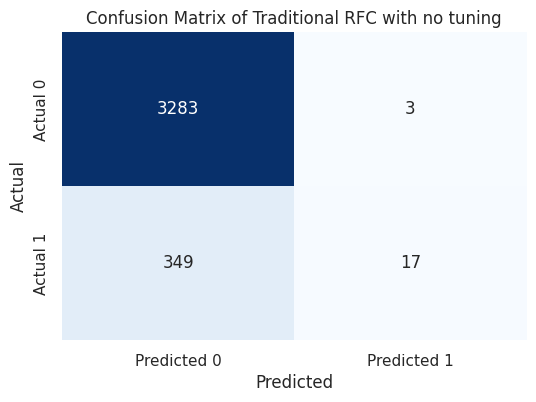

In [13]:
draw_cm(y_test, predictions_rfc, 'Traditional RFC with no tuning')

High false neg error (predict 0 actual 1), low true neg (predict 1 actual 1)

High false neg (FN): a high number of false negatives, which means many churners are being missed. This is problematic if the goal is to correctly identify as many churners as possible.
false neg are more costly: Missing out on identifying churners can lead to direct revenue loss, whereas some false positives might just result in unnecessary but less costly actions.

Low Recall: This indicates that the model is not capturing a sufficient number of actual churners.

---

### Feature's importances

**As predicted the model is preforming badly with picking up the minority class (churned class), the following step is to test different technique of addresing imbalance in oder to see with technique is most suitable for this dataset**
to answer the question is price driving churn, we would need a better model to predict churn in order to see the features driving churn and whether or not those actually include price fluctuation/price-sensitivity

In [14]:
ft_importance = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

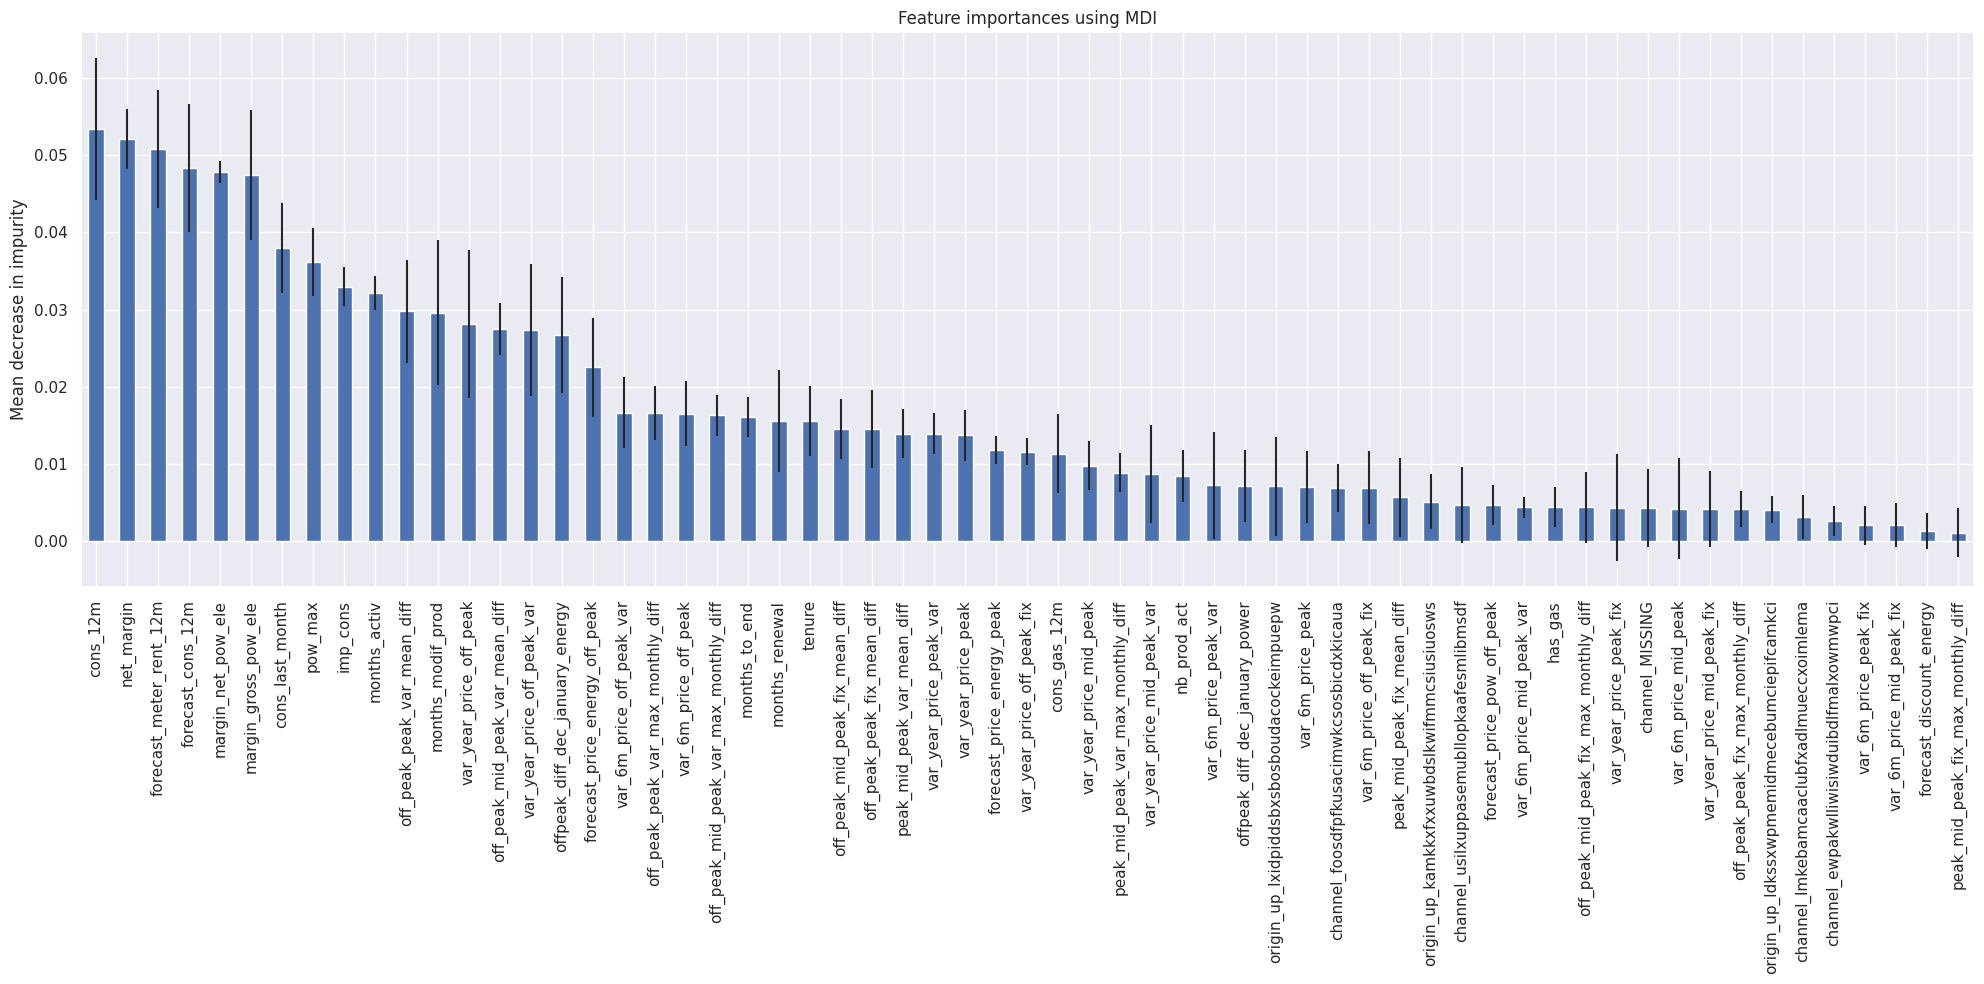

In [15]:
feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]

forest_importances = pd.Series(ft_importance, index=feature_names).sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(20,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [16]:
print(forest_importances)

cons_12m                                    0.053398
net_margin                                  0.052070
forecast_meter_rent_12m                     0.050829
forecast_cons_12m                           0.048348
margin_net_pow_ele                          0.047846
                                              ...   
channel_ewpakwlliwisiwduibdlfmalxowmwpci    0.002652
var_6m_price_peak_fix                       0.002080
var_6m_price_mid_peak_fix                   0.002075
forecast_discount_energy                    0.001365
peak_mid_peak_fix_max_monthly_diff          0.001140
Length: 61, dtype: float64


In [17]:
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

Based on the feature importance analysis using **Mean Decrease in Impurity** method, we can see that:
- To answer the question:

   >Does price-sensitivity drive churn?
    
    > Based on the analysis using the **Mean Decrease in Impurity** method, we can see that most of the variance in pricing of the same type within a period of half a year and a year does **not*** have a **strong impact** when compared to pricing difference within the each of the day period, the 2 top pricing features that has the highest ranked effect are 'off_peak_peak_var_mean_diff' (the averaged diffrence over the span of the previous year between the price of the off peak vs the peak period) and the 'off_peak_mid_peak_var_mean_diff (the averaged diffrence over the span of the previous year between the price of the off peak vs the mid peak period), however considering their MDI values, these effect are still  very small

- Secondly, regarding the highest impacting features behind churners:
- - The top 5 features with the most importance in making the prediction of the churner are: 'cons_12m', 'net_margin','forecast_meter_rent_12m', 'margin_gross_pow_ele','margin_net_pow_ele', however the effect is ***very small***. This could be due to the features' high multi-colinearity  Consider checking for correlations between features. High correlation between features can affect the interpretation of feature importance.

- - The top 5 features with the most importance are all numerical data with high number of unique values (*high cardinality feature*) which indicates that this can be due to the fact the RFC models tends to overfit on high cardinality numerical features (more on the biass of RFC feature importance method can be found in [this documentation](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py) 
- -  Hence in order to make sure, the RFC is not overfitting on the high cardinality numerical features, we need to run a permutation_importances method (where we randomly permutate the training data in order to see how accurate the model preform i

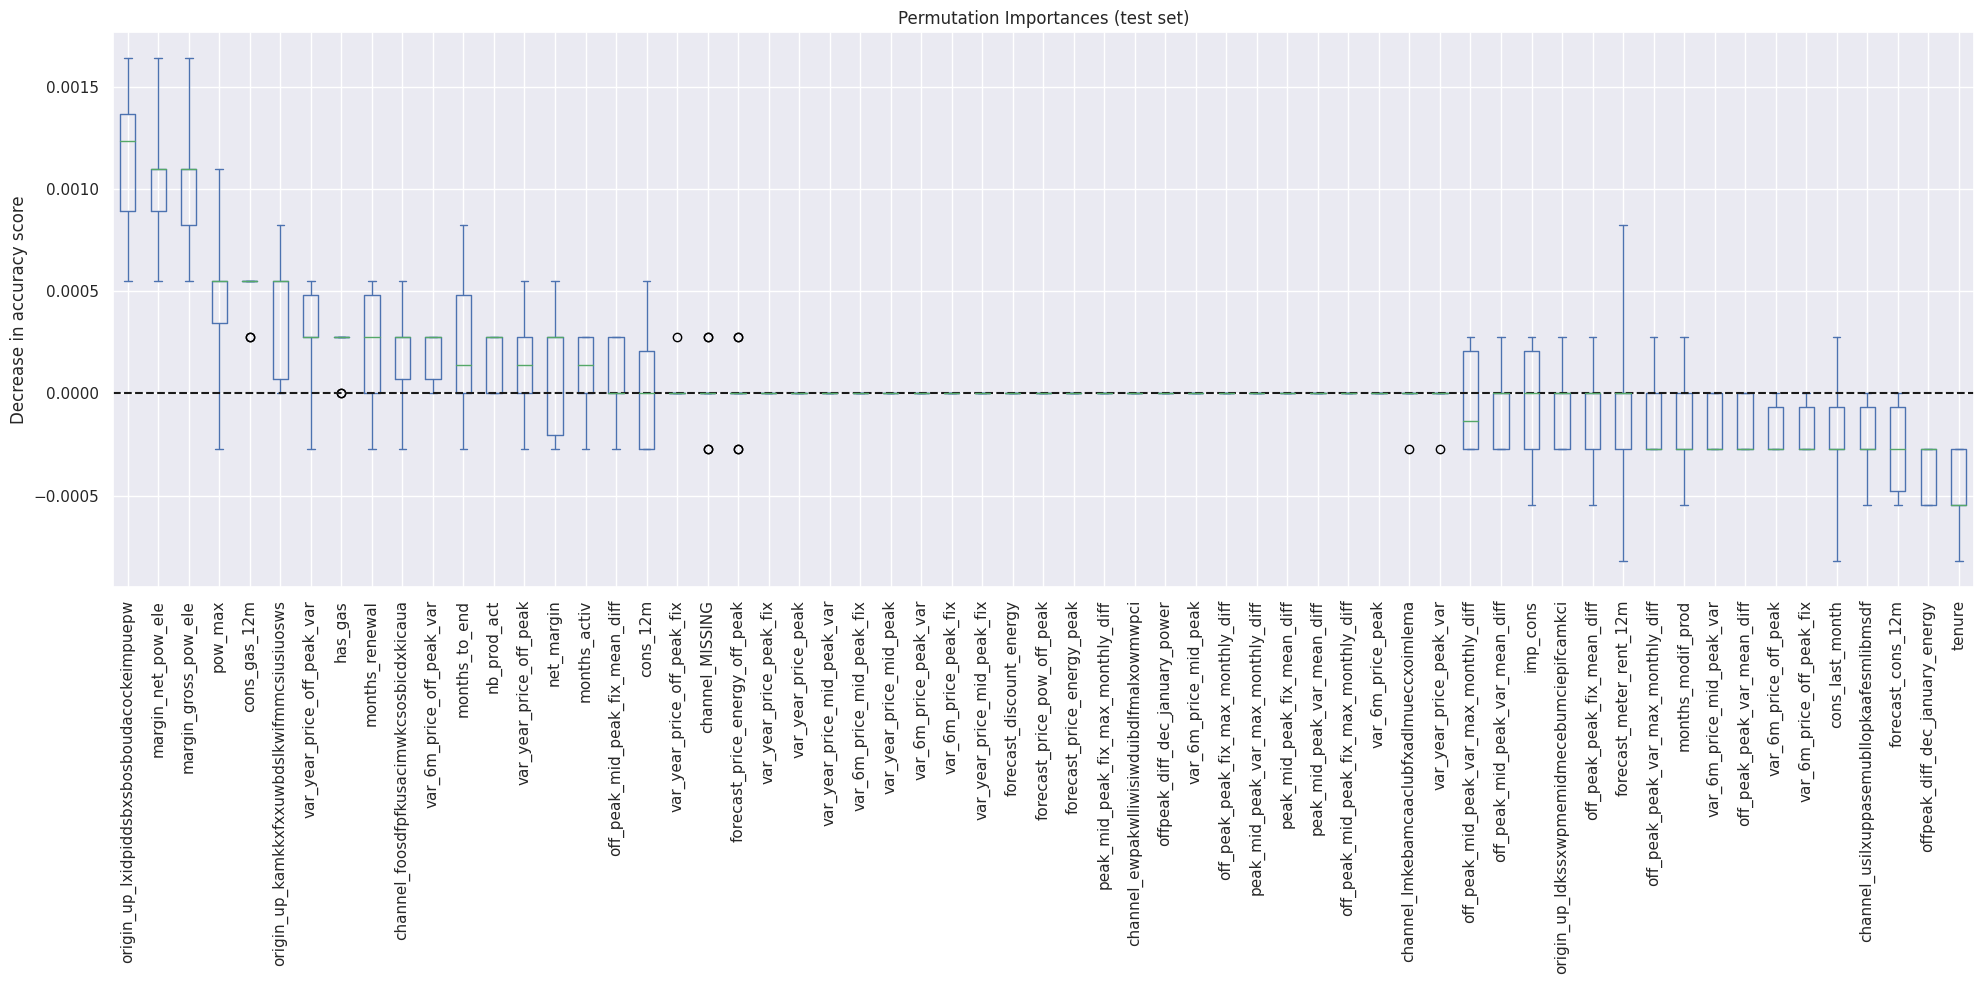

In [18]:
sorted_importances_idx = (-perm_result.importances_mean).argsort()
perm_importances = pd.DataFrame(
    
    perm_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = perm_importances.plot.box(vert=True, whis=10, figsize=(20,10))
ax.set_title("Permutation Importances (test set)")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_ylabel("Decrease in accuracy score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.tight_layout()

In [19]:
perm_train_result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

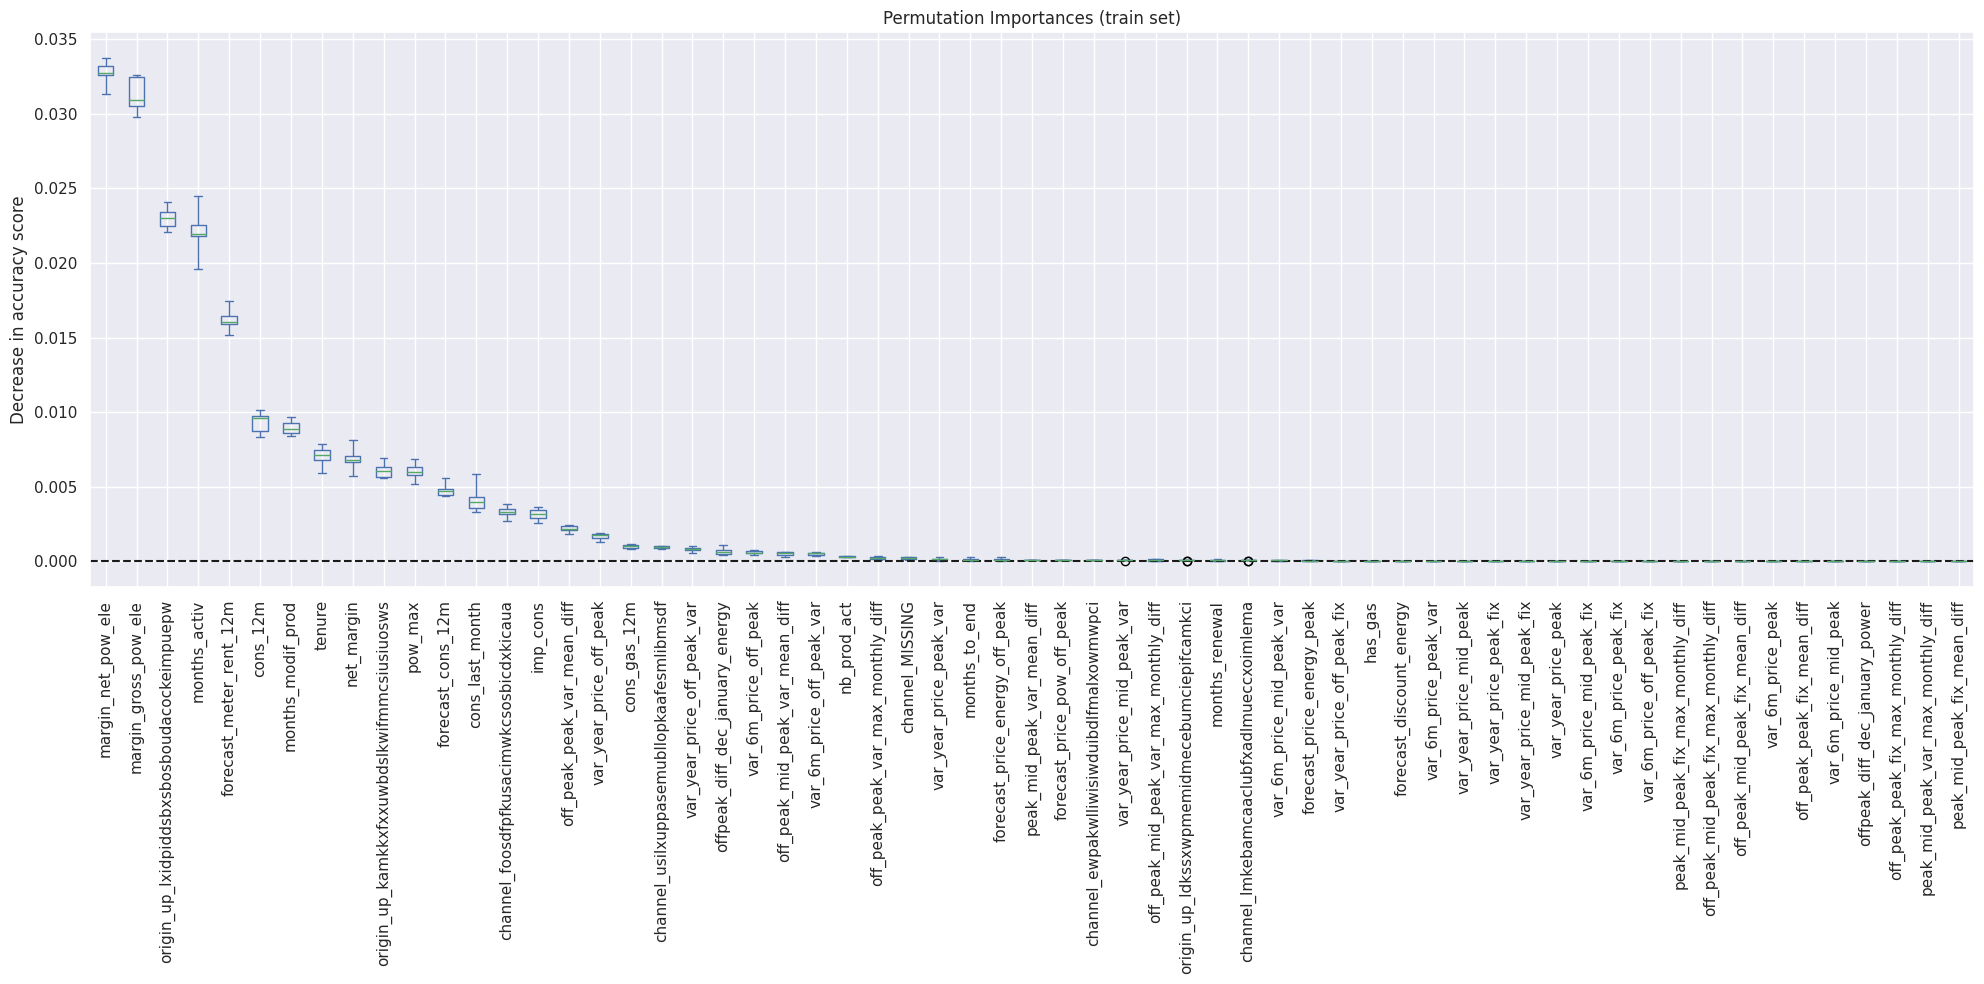

In [20]:
sorted_importances_idx_train = (-perm_train_result.importances_mean).argsort()
perm_train_importances = pd.DataFrame(
    perm_train_result.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)
ax = perm_train_importances.plot.box(vert=True, whis=10, figsize=(20,10))
ax.set_title("Permutation Importances (train set)")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_ylabel("Decrease in accuracy score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.tight_layout()

In [21]:
# sorted_importances_idx_train = 
perm_test_df = pd.DataFrame({
    'importances_mean_test': perm_result.importances_mean[sorted_importances_idx],
    'importances_std_test': perm_result.importances_std[sorted_importances_idx]
}, index=X.columns[sorted_importances_idx])


 
perm_train_df = pd.DataFrame({
    'importances_mean_train': perm_train_result.importances_mean[sorted_importances_idx_train],
    'importances_std_train': perm_train_result.importances_std[sorted_importances_idx_train]
}, index=X.columns[sorted_importances_idx_train])


forest_importances = pd.DataFrame({
    'rfc_ft_importances': rfc.feature_importances_,
    'rfc_ft_importances_std':np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
},index=X.columns)

perm_test_df = perm_test_df.reset_index().rename(columns={'index': 'feature_index'})
perm_train_df = perm_train_df.reset_index().rename(columns={'index': 'feature_index'})
forest_importances = forest_importances.reset_index().rename(columns={'index': 'feature_index'})


# Perform the merge operation
feature_import_agg = perm_test_df.merge(perm_train_df , on='feature_index', how='left')
feature_import_agg = feature_import_agg.merge(forest_importances , on='feature_index', how='left')

feature_import_agg.sort_values(by=['importances_mean_test', 'importances_mean_train','rfc_ft_importances' ],ascending=False).head(20)

feature_index  importances_mean_test  \
0   origin_up_lxidpiddsbxsbosboudacockeimpuepw           1.177437e-03   
1                           margin_net_pow_ele           1.067908e-03   
2                         margin_gross_pow_ele           9.857612e-04   
3                                      pow_max           5.202629e-04   
4                                 cons_gas_12m           4.928806e-04   
5   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws           4.107338e-04   
6                  var_year_price_off_peak_var           2.738226e-04   
7                                      has_gas           2.190581e-04   
8                               months_renewal           2.190581e-04   
9     channel_foosdfpfkusacimwkcsosbicdxkicaua           1.916758e-04   
10                   var_6m_price_off_peak_var           1.916758e-04   
11                               months_to_end           1.916758e-04   
12                                 nb_prod_act           1.642935e-04   
13                     var_year_price_off_peak           1.642935e-04   
14                                  net_margin           1.369113e-04   
15                                months_activ           8.214677e-05   
16             off_peak_mid_peak_fix_mean_diff           8.214677e-05   
17                                    cons_12m           2.738226e-05   
18                 var_year_price_off_peak_fix           2.738226e-05   
19                             channel_MISSING           2.220446e-17   

    importances_std_test  importances_mean_train  importances_std_train  \
0               0.000347                0.023033               0.000648   
1               0.000356                0.032700               0.000783   
2               0.000305                0.031285               0.001026   
3               0.000376                0.005998               0.000440   
4               0.000110                0.001004               0.000108   
5               0.000306                0.006089               0.000445   
6               0.000245                0.000803               0.000121   
7               0.000110                0.000000               0.000000   
8               0.000268                0.000073               0.000055   
9               0.000214                0.003305               0.000341   
10              0.000125                0.000511               0.000073   
11              0.000347                0.000128               0.000073   
12              0.000134                0.000320               0.000046   
13              0.000251                0.001680               0.000192   
14              0.000306                0.006829               0.000611   
15              0.000214                0.022074               0.001220   
16              0.000175                0.000000               0.000000   
17              0.000311                0.009293               0.000603   
18              0.000082                0.000000               0.000000   
19              0.000173                0.000219               0.000061   

    rfc_ft_importances  rfc_ft_importances_std  
0             0.007142                0.003197  
1             0.047846                0.009604  
2             0.047445                0.009388  
3             0.036178                0.007508  
4             0.011358                0.003899  
5             0.005143                0.002848  
6             0.027408                0.006402  
7             0.004428                0.002202  
8             0.015579                0.004974  
9             0.006936                0.002853  
10            0.016681                0.005048  
11            0.016137                0.005079  
12            0.008470                0.003358  
13            0.028126                0.006572  
14            0.052070                0.008515  
15            0.032183                0.006926  
16            0.014575                0.004726  
17            0.053398                0.0

In [22]:
feature_import_agg.tail(20)

feature_index  importances_mean_test  \
41                           var_6m_price_peak               0.000000   
42    channel_lmkebamcaaclubfxadlmueccxoimlema              -0.000027   
43                     var_year_price_peak_var              -0.000027   
44      off_peak_mid_peak_var_max_monthly_diff              -0.000055   
45             off_peak_mid_peak_var_mean_diff              -0.000055   
46                                    imp_cons              -0.000082   
47  origin_up_ldkssxwpmemidmecebumciepifcamkci              -0.000082   
48                 off_peak_peak_fix_mean_diff              -0.000082   
49                     forecast_meter_rent_12m              -0.000082   
50          off_peak_peak_var_max_monthly_diff              -0.000137   
51                           months_modif_prod              -0.000164   
52                   var_6m_price_mid_peak_var              -0.000164   
53                 off_peak_peak_var_mean_diff              -0.000164   
54                       var_6m_price_off_peak              -0.000192   
55                   var_6m_price_off_peak_fix              -0.000192   
56                             cons_last_month              -0.000246   
57    channel_usilxuppasemubllopkaafesmlibmsdf              -0.000246   
58                           forecast_cons_12m              -0.000274   
59             offpeak_diff_dec_january_energy              -0.000383   
60                                      tenure              -0.000465   

    importances_std_test  importances_mean_train  importances_std_train  \
41              0.000000                0.000000               0.000000   
42              0.000082                0.000073               0.000037   
43              0.000082                0.000146               0.000093   
44              0.000239                0.000082               0.000076   
45              0.000205                0.000520               0.000108   
46              0.000301                0.003150               0.000330   
47              0.000175                0.000073               0.000037   
48              0.000246                0.000000               0.000000   
49              0.000425                0.016204               0.000600   
50              0.000184                0.000228               0.000094   
51              0.000219                0.008956               0.000459   
52              0.000134                0.000064               0.000042   
53              0.000134                0.002191               0.000183   
54              0.000125                0.000603               0.000093   
55              0.000125                0.000000               0.000000   
56              0.000286                0.004062               0.000713   
57              0.000192                0.000940               0.000071   
58              0.000212                0.004747               0.000356   
59              0.000134                0.000648               0.000185   
60              0.000175                0.007066               0.000575   

    rfc_ft_importances  rfc_ft_importances_std  
41            0.007084                0.003187  
42            0.003141                0.001888  
43            0.013968                0.004576  
44            0.016353                0.004968  
45            0.027481                0.006426  
46            0.033000                0.006693  
47            0.004138                0.002345  
48            0.014536                0.004680  
49            0.050829                0.008461  
50            0.016659                0.005098  
51            0.029601                0.006516  
52            0.004433                0.002619  
53            0.029786                0.006952  
54            0.016535                0.005133  
55            0.006930                0.003350  
56            0.037981                0.007663  
57            0.004717                0.002476  
58            0.048348                0.0

Based on the feature importance analysis using **Permutation Importances** method, we can see that:

- With the test set, the permutation importance of the feature 'origin_up_lxidpiddsbxsbosboudacockeimpuepw' (one-hot encoded categorical feature a low cardinality feature) has the highest decrease in the model's accuracy when permutated, 

    The 2nd to 5th features are ***'margin_net_pow_ele', 'margin_gross_pow_ele', 'pow_max', 'cons_12m'*** has the most impact on the model (these 2 numerical feature (with high cardinality)) has a noticable impact in the modle's prediction (RFC did not overfit on these features), supported by the result of the feature_importances_ method as well , 
- With the train set, it also supports the fact the 1st and 2nd feature are 'margin_net_pow_ele', 'margin_gross_pow_ele' has the most impact on the model (confirming that these 2 numerical feature (with high cardinality) has a noticable impact in the modle's prediction

Based on the feature importance analysis using **Permutation Importances combines with RFC feature_importances_** method, we can see that:

- Multiple features that show a negative decrese in accuracy on the **test** set (**indicating randomly shuffling these features actually improved the model's performance**) when running the Permutation Importances method could mean one of the following things:

    a) Random Chance: If the feature isn't very important, running the permutation_importance method, meanign effectivly shuffling accidentally create a slightly better pattern just by chance, this is especially easily observed on smaller datasets.

    b) Overfitting: If the model was overfitting on that feature, removing its influence by shuffling might improve performance on the validation set. 
    > This could be true for the 'tenure', 'forecast_cons_12m', 'forecast_meter_rent_12m', 'channel_usilxuppasemubllopkaafesmlibmsdf' features, due to its high ranking in the when running the permutation_importance on the **train** set, but is has the highest negative decrease in accuracy when running on the **test** set. This could further be partially explained by the fact that as customers' tenure increase to a certain point, customer churn peak around the inner quantile range however as we increase the tenure, customer chunr decreases, because customer with high tenure tend to become loyalist

    c) High multicolinearity allowing for features Interactions and proxy feautres :A feature might be suppressing the effect of other more important features. Shuffling it allows those other features to express their importance more clearly. Proxy Features: Sometimes a feature might be acting as a proxy for another more important feature. Shuffling it might allow the more fundamental relationship to be expressed.
     > This could be true for the: 'off_peak_peak_var_max_monthly_diff',  'months_modif_prod', 'var_6m_price_mid_peak_var', 'off_peak_peak_var_mean_diff', 'var_6m_price_off_peak','cons_last_month','forecast_cons_12m', 'offpeak_diff_dec_january_energy' feature, due to its high corr-coef with other independent features

 > **Conclusion**: 
1. Features to drop or modified:

    a) High Multicollinearity:
    Features with 'price' in the name that are highly correlated with each other. 
- keep one representative feature from this group and drop the others.
- Examples: 'var_6m_price_off_peak', 'var_6m_price_mid_peak_var', 'off_peak_peak_var_mean_diff', 'off_peak_peak_var_max_monthly_diff'

    b) Potential Proxy Features:

- 'forecast_cons_12m' and 'cons_last_month' might be proxies for each other or for 'cons_12m'
- 'forecast_meter_rent_12m' might be a proxy for other consumption or pricing features

    c) Low Importance and Negative Impact:

- 'channel_usilxuppasemubllopkaafesmlibmsdf' - if this is a rare category in a categorical variable, it might not be adding much value
- 'offpeak_diff_dec_january_energy' - if this is consistently showing low importance across methods
2. Features to Be Cautious About Dropping:

    a) 'tenure' - While it shows negative permutation importance, it often has a non-linear relationship with churn as noted. Consider binning or creating polynomial features instead of dropping it.

    b) 'months_modif_prod' - This could be an important business feature. Consider its business significance before dropping.

3. Approach:
- Drop highly correlated 'price' features, keeping one representative feature.
- Create feature subsets:

- - Subset 1: Drop all identified features
- - Subset 2: Keep 'tenure' and 'months_modif_prod', drop others
- - Subset 3: Use feature engineering (e.g., binning 'tenure', combining correlated features) instead of dropping


- Train models on each subset and compare performance.
- - Use techniques like Recursive Feature Elimination (RFE) or LASSO regularization for more robust feature selection.


4. Definitely Consider Dropping:

- Highly correlated 'price' features (keep one representative)
- 'channel_usilxuppasemubllopkaafesmlibmsdf' (relatively rare category)
- 'forecast_cons_12m' ('cons_12m' is more reliable)
- 'offpeak_diff_dec_january_energy' (unimportant)
    

---
## Data scaling for pipeline intergration

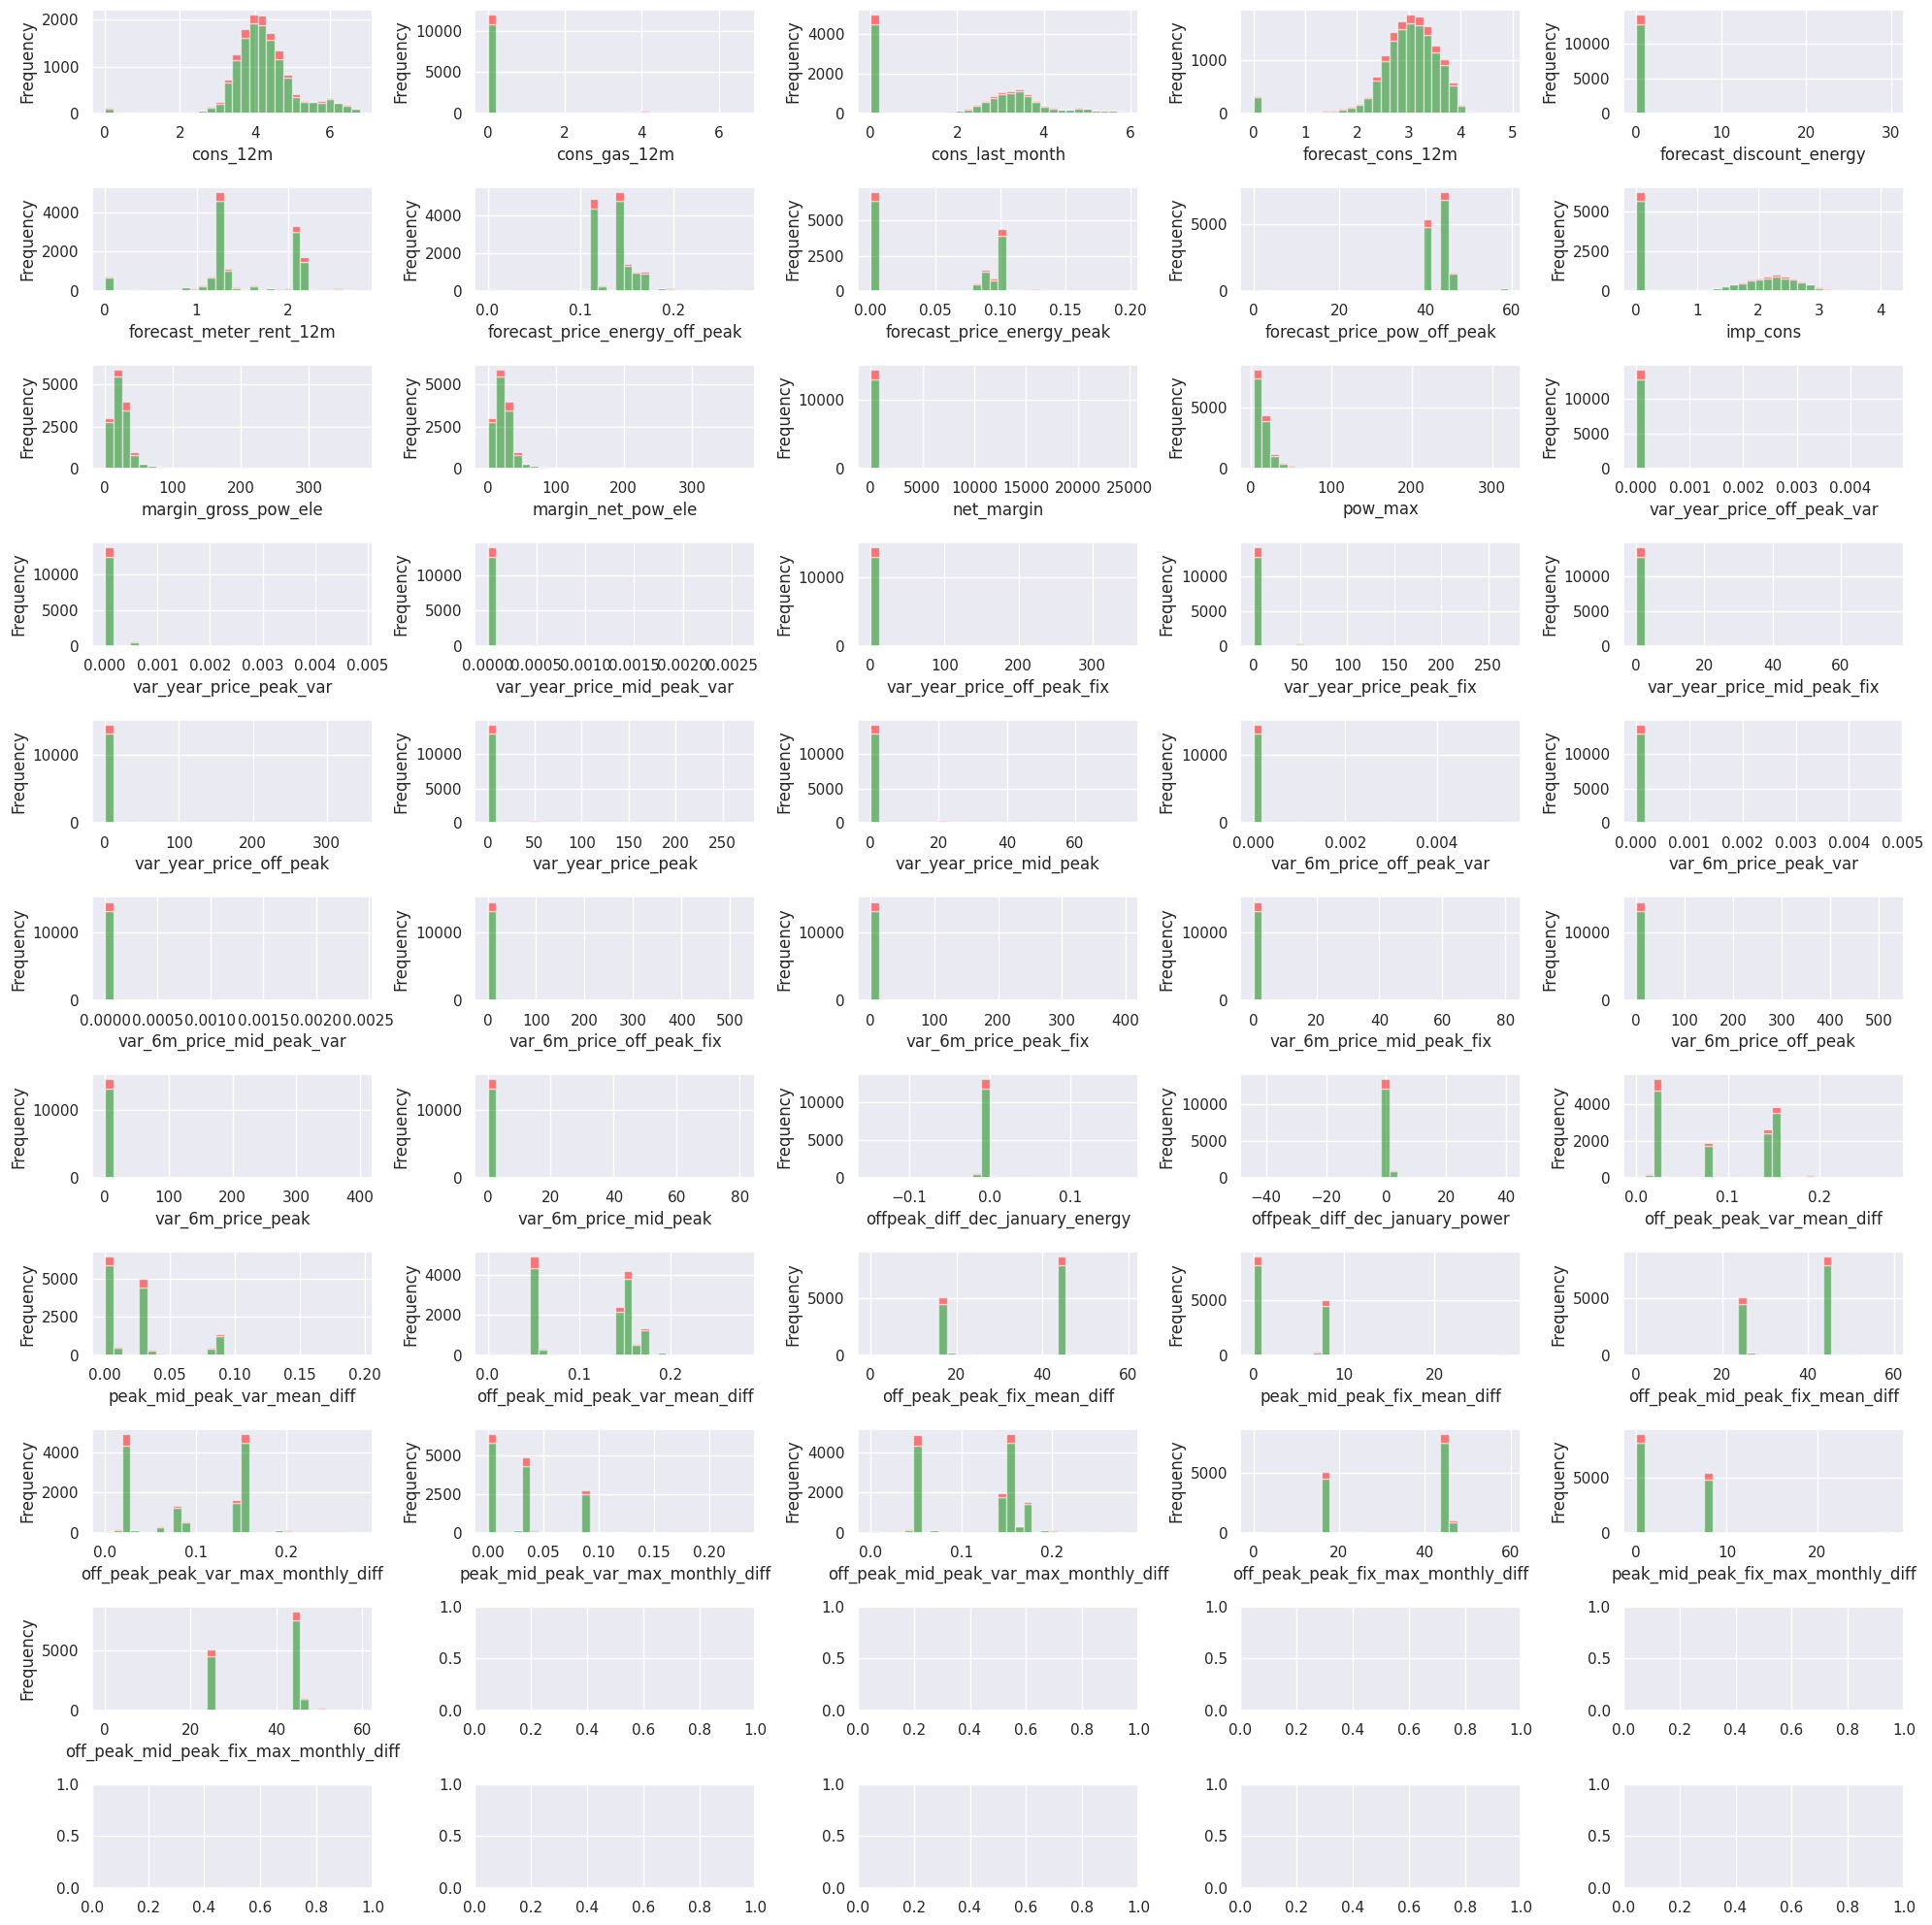

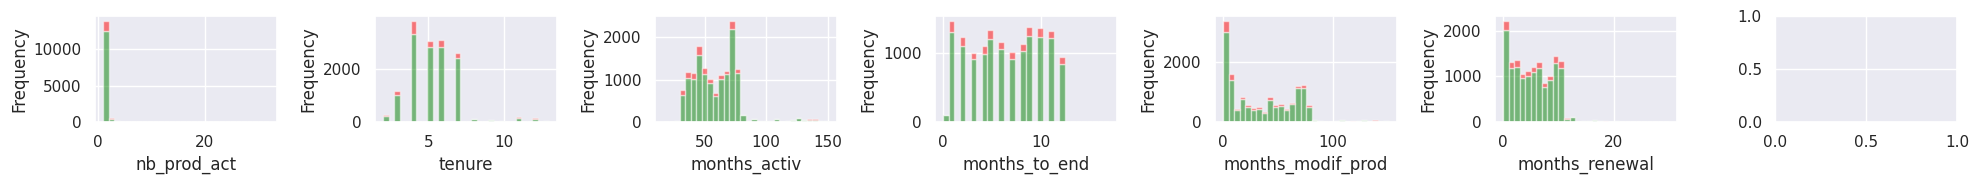

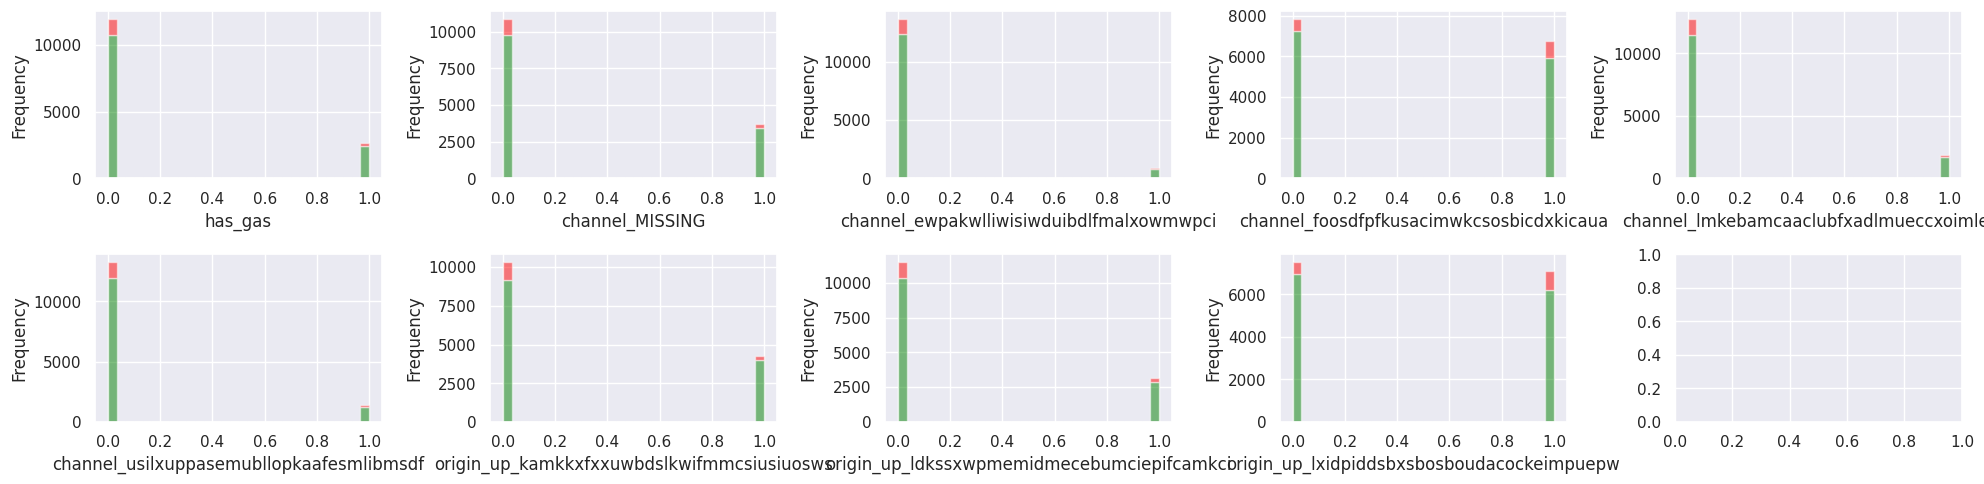

In [23]:
# num_list
# discrete_list
# cat_list
def plot_hist(col_list, df, fig_size):
    n_rows = len(col_list)//4
    n_cols = (len(col_list)+n_rows )//n_rows
    fig, axs = plt.subplots(nrows = n_rows, ncols=n_cols, figsize = fig_size)
    axs=axs.flatten()
    for i in range(len(col_list)):
        churn_data = df[df['churn'] == 1][col_list[i]]
        non_churn_data = df[df['churn'] == 0][col_list[i]]

        axs[i].hist([non_churn_data, churn_data], 
                    bins=30,  # Adjust the number of bins if needed
                    stacked=True, 
                    color=['green', 'red'], 
                    alpha=0.5, 
                    label=['Non-Churn', 'Churn'])

        axs[i].set_xlabel(col_list[i])
        axs[i].set_ylabel('Frequency')
        
    fig.tight_layout()
    plt.show()

plot_hist(num_list, df, (20,20))
plot_hist(discrete_list, df, (20,2))
plot_hist(cat_list, df, (20,5))


In [24]:
def select_columns_for_preprocessing(numerical_data, df, skew_threshold=2.0, quantile_threshold=0.2):
#     quantile_scale_ft = []
    robust_scale_num_ft = []
    
    for column in numerical_data:
        skewness = df[column].skew()
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        data_range = df[column].max() - df[column].min()
        
        if (abs(skewness) > skew_threshold) & (iqr / data_range <= quantile_threshold):
            robust_scale_num_ft.append(column)
    
    return robust_scale_num_ft

In [25]:
skew_threshold=1
quantile_threshold=0.2
# filter numerical continuous and discrete values:
# X[X.nunique().index[X.nunique().values>2]].columns.tolist()
robust_scale_num_ft = \
select_columns_for_preprocessing(X[X.nunique().index[X.nunique().values>2]].columns.tolist(), \
                                  df, skew_threshold, quantile_threshold)

preprocessor = ColumnTransformer(
    transformers=[
#         ('quantile', QuantileTransformer(output_distribution='normal'), quantile_scale_ft),
        ('robust', RobustScaler(quantile_range=(35,65),), robust_scale_num_ft)
    ],
    remainder='passthrough'  # Keeps the remaining columns as is
)

In [26]:
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators = 1000,random_state=42))
])


pipeline2.fit(X_train, y_train)

y_pred_pl2 = pipeline2.predict(X_test)

In [27]:
# Calculate precision, recall, and f1 score
precision_pl2 = precision_score(y_test, y_pred_pl2)
recall_pl2 = recall_score(y_test, y_pred_pl2)
f1_pl2 = f1_score(y_test, y_pred_pl2)

In [28]:
print(f"Precision: {precision_pl2:.3f}")
print(f"Recall: {recall_pl2:.3f}")
print(f"F1 Score: {f1_pl2:.3f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_pl2))

Precision: 0.826
Recall: 0.052
F1 Score: 0.098

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



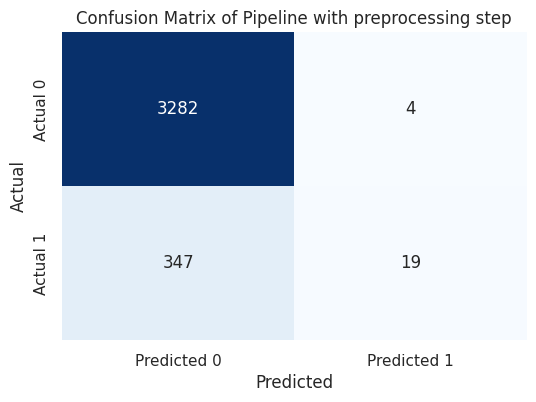

In [29]:
draw_cm(y_test, y_pred_pl2, 'Pipeline with preprocessing step')

### Interpretation of the result from incorporating preprocessing step into pipeline:
    
- Marginally increased the number of churners identified correctly, however it also increasing the number of non-churners identified as churners - FP 
- Overall, the F1, precision and recall ratio did not changed by much for both No preprocessing and Processed model


> **Conclusion**: The preprocessing slightly improved the model's sensitivity to churners.


In [30]:
rfc_pl= pipeline2.named_steps['classifier']
rfc_pl

RandomForestClassifier(n_estimators=1000, random_state=42)

### Feature Importance of PipeLine with Preprocessing step

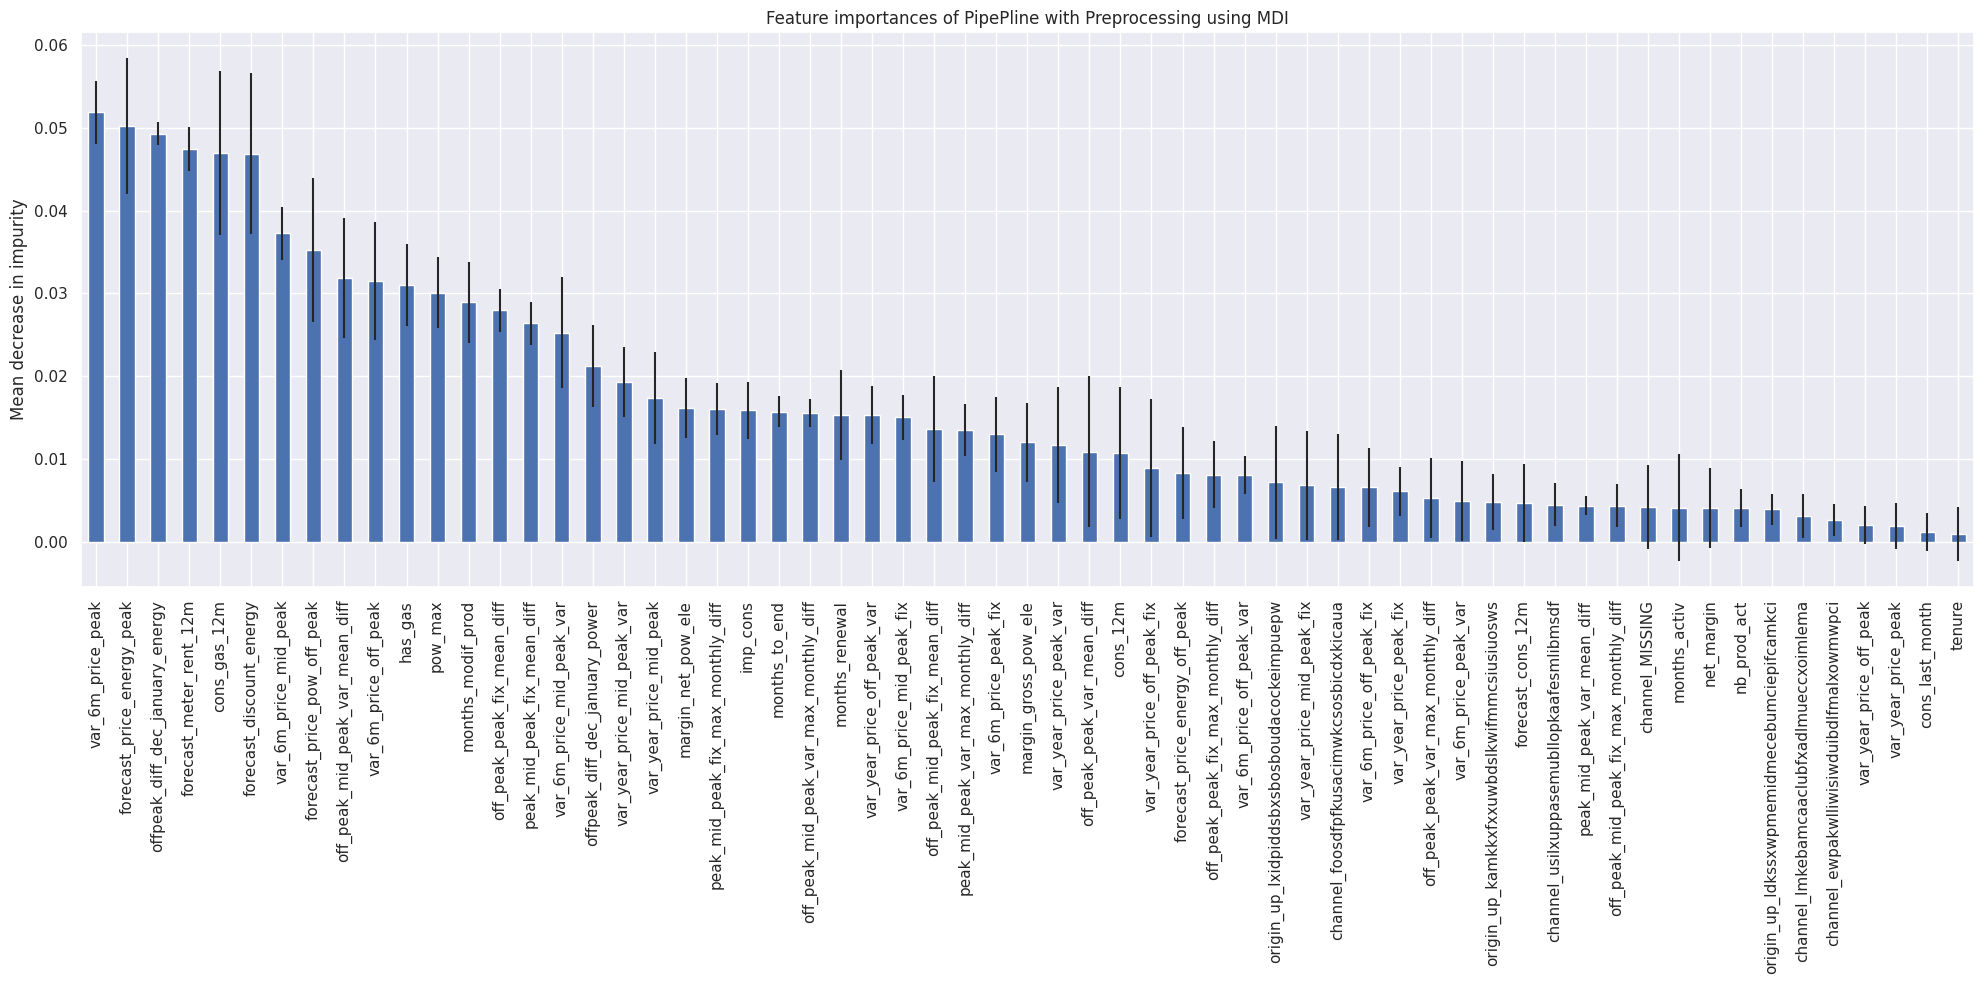

In [31]:
pl_ft_importance = rfc_pl.feature_importances_
pl_std = np.std([tree.feature_importances_ for tree in rfc_pl], axis=0)
pl_feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]

pl_forest_importances = pd.Series(pl_ft_importance, index=pl_feature_names).sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(20,10))
pl_forest_importances.plot.bar(yerr=pl_std, ax=ax)
ax.set_title("Feature importances of PipePline with Preprocessing using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

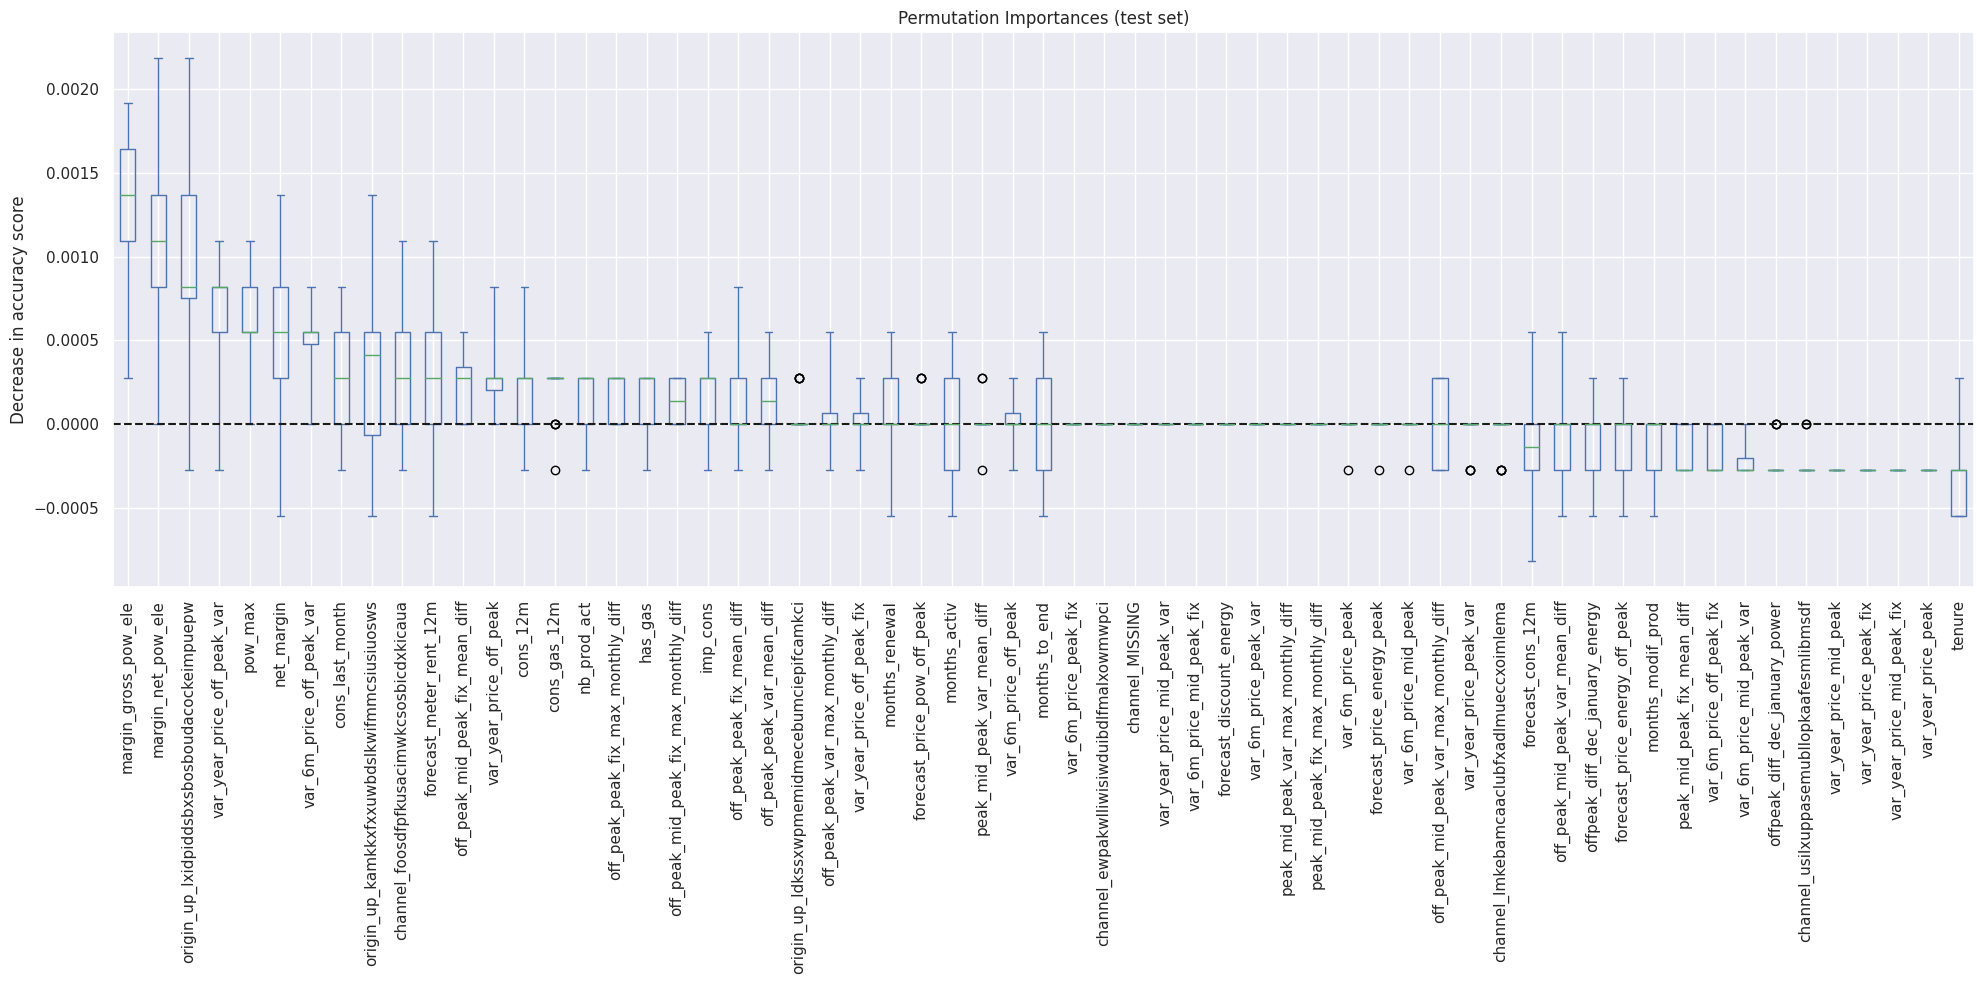

In [32]:
pl_perm_result = permutation_importance(
    pipeline2, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)
pl_sorted_importances_idx = (-pl_perm_result.importances_mean).argsort()
pl_perm_importances = pd.DataFrame(
    
    pl_perm_result.importances[pl_sorted_importances_idx].T,
    columns=X.columns[pl_sorted_importances_idx],
)
ax = pl_perm_importances.plot.box(vert=True, whis=10, figsize=(20,10))
ax.set_title("Permutation Importances (test set)")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_ylabel("Decrease in accuracy score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.tight_layout()

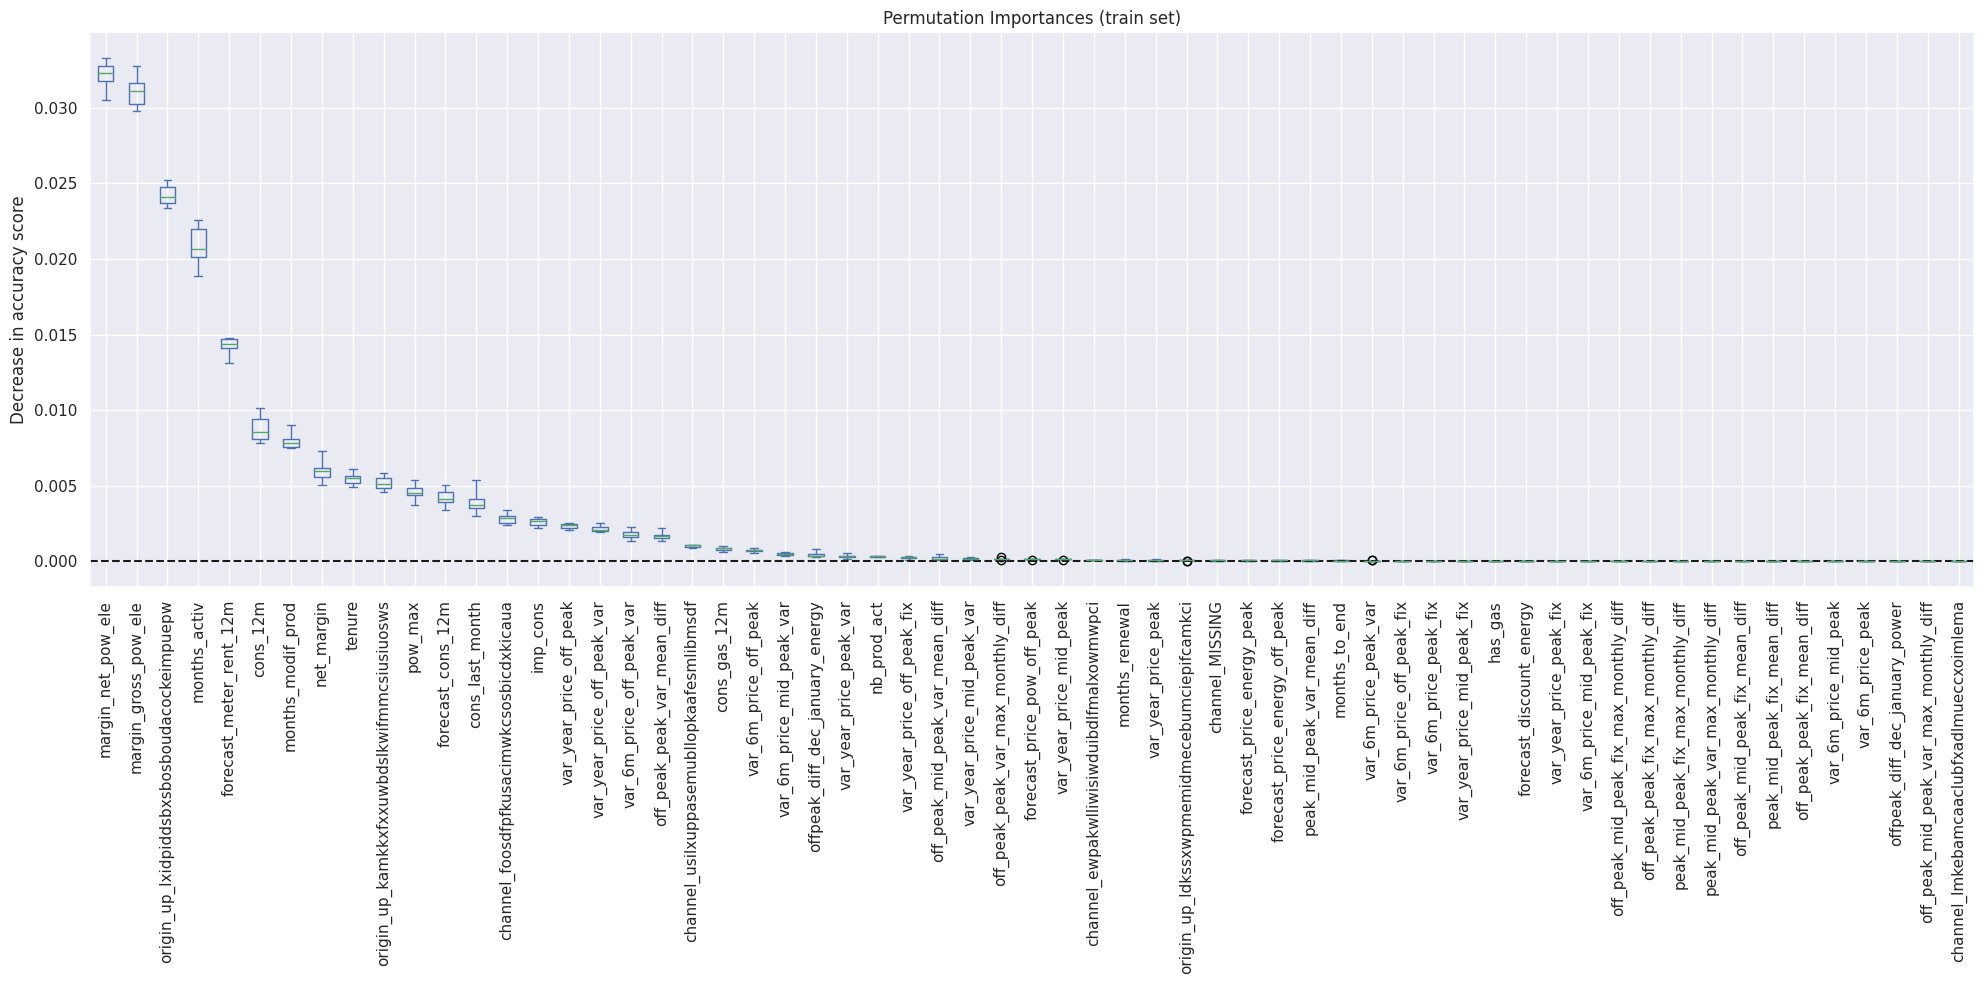

In [33]:
pl_perm_train_result = permutation_importance(
    pipeline2, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
pl_sorted_importances_idx_train = (-pl_perm_train_result.importances_mean).argsort()
pl_perm_train_importances = pd.DataFrame(
    pl_perm_train_result.importances[pl_sorted_importances_idx_train].T,
    columns=X.columns[pl_sorted_importances_idx_train],
)
ax = pl_perm_train_importances.plot.box(vert=True, whis=10, figsize=(20,10))
ax.set_title("Permutation Importances (train set)")
ax.axhline(y=0, color="k", linestyle="--")
ax.set_ylabel("Decrease in accuracy score")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure.tight_layout()

In [34]:
pl_perm_test_df = pd.DataFrame({
    'pl_importances_mean_test': pl_perm_result.importances_mean[pl_sorted_importances_idx],
    'pl_importances_std_test': pl_perm_result.importances_std[pl_sorted_importances_idx]
}, index=X.columns[pl_sorted_importances_idx])


 
pl_perm_train_df = pd.DataFrame({
    'pl_importances_mean_train': pl_perm_train_result.importances_mean[pl_sorted_importances_idx_train],
    'pl_importances_std_train': pl_perm_train_result.importances_std[pl_sorted_importances_idx_train]
}, index=X.columns[pl_sorted_importances_idx_train])


pl_forest_importances = pd.DataFrame({
    'pl_rfc_ft_importances': rfc_pl.feature_importances_,
    'pl_rfc_ft_importances_std':np.std([tree.feature_importances_ for tree in rfc_pl], axis=0)
},index=X.columns)

pl_perm_test_df = pl_perm_test_df.reset_index().rename(columns={'index': 'feature_index'})
pl_perm_train_df = pl_perm_train_df.reset_index().rename(columns={'index': 'feature_index'})
pl_forest_importances = pl_forest_importances.reset_index().rename(columns={'index': 'feature_index'})


# Perform the merge operation
pl_feature_import_agg = pl_perm_test_df.merge(pl_perm_train_df , on='feature_index', how='left')
pl_feature_import_agg = pl_feature_import_agg.merge(pl_forest_importances , on='feature_index', how='left')

pl_feature_import_agg.sort_values(by=['pl_importances_mean_test', 'pl_importances_mean_train','pl_rfc_ft_importances' ],ascending=False).head(20)

feature_index  pl_importances_mean_test  \
0                         margin_gross_pow_ele                  0.001301   
1                           margin_net_pow_ele                  0.001164   
2   origin_up_lxidpiddsbxsbosboudacockeimpuepw                  0.000931   
3                  var_year_price_off_peak_var                  0.000657   
4                                      pow_max                  0.000602   
5                                   net_margin                  0.000479   
6                    var_6m_price_off_peak_var                  0.000465   
7                              cons_last_month                  0.000342   
8   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws                  0.000342   
9     channel_foosdfpfkusacimwkcsosbicdxkicaua                  0.000315   
10                     forecast_meter_rent_12m                  0.000301   
11             off_peak_mid_peak_fix_mean_diff                  0.000260   
12                     var_year_price_off_peak                  0.000260   
13                                    cons_12m                  0.000233   
14                                cons_gas_12m                  0.000205   
15                                 nb_prod_act                  0.000164   
16          off_peak_peak_fix_max_monthly_diff                  0.000151   
17                                     has_gas                  0.000151   
18      off_peak_mid_peak_fix_max_monthly_diff                  0.000137   
19                                    imp_cons                  0.000137   

    pl_importances_std_test  pl_importances_mean_train  \
0                  0.000449                   0.031012   
1                  0.000449                   0.032217   
2                  0.000650                   0.024265   
3                  0.000329                   0.002164   
4                  0.000268                   0.004610   
5                  0.000457                   0.005961   
6                  0.000196                   0.001789   
7                  0.000334                   0.003880   
8                  0.000519                   0.005176   
9                  0.000370                   0.002848   
10                 0.000396                   0.014241   
11                 0.000203                   0.000000   
12                 0.000203                   0.002355   
13                 0.000249                   0.008764   
14                 0.000147                   0.000849   
15                 0.000160                   0.000338   
16                 0.000136                   0.000000   
17                 0.000161                   0.000000   
18                 0.000137                   0.000000   
19                 0.000237                   0.002629   

    pl_importances_std_train  pl_rfc_ft_importances  pl_rfc_ft_importances_std  
0                   0.000892               0.012052                   0.004265  
1                   0.000806               0.016234                   0.004842  
2                   0.000630               0.007228                   0.003268  
3                   0.000178               0.015328                   0.004948  
4                   0.000440               0.030076                   0.006654  
5                   0.000589               0.004152                   0.002575  
6                   0.000256               0.008093                   0.003518  
7                   0.000624               0.001253                   0.001379  
8                   0.000410               0.004855                   0.002767  
9                   0.000326               0.006705                   0.002679  
10                  0.000532               0.047415                   0.009719  
11                  0.000000               0.013640                   0.004716  
12                  0.000146               0.002053                   0.001813  
13                  0.000763               0.010739                   0.003790  
14

In [35]:
rfc_pl_agg_imp_agg = pl_feature_import_agg.merge(feature_import_agg , on='feature_index', how='left')
rfc_pl_agg_imp_agg['overall_mean']= rfc_pl_agg_imp_agg[['pl_importances_mean_test','pl_importances_mean_train','pl_rfc_ft_importances', \
                                                        'rfc_ft_importances', 'importances_mean_test', 'importances_mean_train']].mean(axis=1) 
rfc_pl_agg_imp_agg= rfc_pl_agg_imp_agg.sort_values(by=['overall_mean','pl_importances_mean_test','importances_mean_test' ],ascending=False)

In [36]:
# Testcode to view aggrefated importance df                                                                  
# print(rfc_pl_agg_imp_agg['feature_index'].head(30))

# print(rfc_pl_agg_imp_agg['feature_index'].tail(30))

In [37]:
rfc_pl_agg_imp_agg.head()

feature_index  pl_importances_mean_test  \
1        margin_net_pow_ele                  0.001164   
10  forecast_meter_rent_12m                  0.000301   
0      margin_gross_pow_ele                  0.001301   
13                 cons_12m                  0.000233   
27             months_activ                  0.000027   

    pl_importances_std_test  pl_importances_mean_train  \
1                  0.000449                   0.032217   
10                 0.000396                   0.014241   
0                  0.000449                   0.031012   
13                 0.000249                   0.008764   
27                 0.000299                   0.020869   

    pl_importances_std_train  pl_rfc_ft_importances  \
1                   0.000806               0.016234   
10                  0.000532               0.047415   
0                   0.000892               0.012052   
13                  0.000763               0.010739   
27                  0.001161               0.004172   

    pl_rfc_ft_importances_std  importances_mean_test  importances_std_test  \
1                    0.004842               0.001068              0.000356   
10                   0.009719              -0.000082              0.000425   
0                    0.004265               0.000986              0.000305   
13                   0.003790               0.000027              0.000311   
27                   0.002576               0.000082              0.000214   

    importances_mean_train  importances_std_train  rfc_ft_importances  \
1                 0.032700               0.000783            0.047846   
10                0.016204               0.000600            0.050829   
0                 0.031285               0.001026            0.047445   
13                0.009293               0.000603            0.053398   
27                0.022074               0.001220            0.032183   

    rfc_ft_importances_std  overall_mean  
1                 0.009604      0.021871  
10                0.008461      0.021485  
0                 0.009388      0.020680  
13                0.009242      0.013742  
27                0.006926      0.013235

### Subseting the features for training 

> For subseting features to test feature's impact on the model:It's generally better to use the feature importance from the pipeline with preprocessing. The reason is that this importance reflects how the features contribute to the model's performance after they've been transformed, which is more representative of their actual impact in your final model.



> For testing the feature's subset preformance: Testing subsets in the pipeline with preprocessing would be better for several reasons:
- It maintains consistency with how you'll likely deploy the model in production.
- It allows you to see how the feature selection interacts with the preprocessing steps.
- It might reveal interactions between preprocessing and feature importance that aren't visible when testing on raw data.

#### Approach for subsetting:
a) Start with the full preprocessed feature set as baseline.

b) Create subsets based on your previous analysis:
   - Subset 1: Remove highly correlated features
   - Subset 2: Keep only top N important features from your various importance methods
   - Subset 3: Remove features with consistently low importance across methods and high correlation coefficient with other features
   
c) Use cross-validation to compare the performance of these subsets.

#### Feature dropping strategy:


a) Drop features with consistently low importance across all your methods (feature_importances_, permutation importance on train and test from the pipeline).

b) For highly correlated feature groups:
   - Identify groups of features with correlation > 0.9 (or another threshold you deem appropriate).
   - Within each group, keep the feature with the highest average importance across your methods.
   - Drop the others in the group.

c) After this initial dropping, reassess feature importances and correlations. Some features might become more important once their highly correlated counterparts are removed.


In [38]:
def create_correlated_groups(X, threshold=0.9):
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop


highly_correlated = create_correlated_groups(X_train)
top_features = rfc_pl_agg_imp_agg['feature_index'].head(50)  # Top 50 most impactful features
low_importance = [f for f in X_train.columns if f not in top_features.values]
low_imp_and_high_corr = list(set(low_importance) & set(highly_correlated)) 

subset1 = X_train.drop(columns=highly_correlated)
subset2 = X_train[top_features] # columns in decsending importance order 
subset3 = X_train.drop(columns=low_importance) # retain the same order of the columns 
subset4 = X_train.drop(columns =low_imp_and_high_corr)

In [39]:
# Testcode for subsetting
# subset3
# set(low_importance) & set(highly_correlated)
# low_imp_and_high_corr = list(set(subset2) & set(subset3)) 
# len(low_imp_and_high_corr)
test1=set(X_train.drop(columns=low_importance).columns.to_list())
# # len(top_features.values)
# # subset3.shape
test2=set(X_train[top_features].columns.to_list())
test1-test2
print(subset2.columns.equals(subset3.columns))


False


In [40]:
# !conda install -y -c rapidsai -c nvidia -c conda-forge cuml


4. Evaluate subsets:

In [71]:
from cuml.ensemble import RandomForestClassifier as cuRFClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer, RobustScaler
import numpy as np


def evaluate_subset(X_subset, y, preprocessor):
    # Get the column names from X_subset
    subset_columns = X_subset.columns.tolist()
    
    # Modify the preprocessor to only use columns that are present in X_subset
    new_preprocessor = ColumnTransformer(
        transformers=[
#             ('quantile', QuantileTransformer(output_distribution='normal'), 
#              [col for col in quantile_scale_ft if col in subset_columns]),
            ('robust', RobustScaler(), 
             [col for col in robust_scale_num_ft if col in subset_columns])
        ],
        remainder='passthrough'
    )
    
    pipeline = Pipeline([
        ('preprocessor', new_preprocessor),
        ('classifier', cuRFClassifier(n_streams=1 , n_estimators=1000, random_state=42))
    ])
    
    scores = cross_val_score(pipeline, X_subset, y, cv=5, scoring='f1')
    return np.mean(scores)

# covert to float32 bẻoe pasing to the pipeline (use pickling first train using float32 data to fit the estimator)
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
subset1 = subset1.astype('float32')
subset2 = subset2.astype('float32')
subset3 = subset3.astype('float32')
subset4 = subset4.astype('float32')
ss_results = {
    'full': evaluate_subset(X_train, y_train, preprocessor),
    'subset1': evaluate_subset(subset1, y_train, preprocessor),
    'subset2': evaluate_subset(subset2, y_train, preprocessor),
    'subset3': evaluate_subset(subset3, y_train, preprocessor),
    'subset4': evaluate_subset(subset4, y_train, preprocessor)
}

ss_results


{'full': 0.0774224590490427,
 'subset1': 0.06921471506123049,
 'subset2': 0.08271556085860075,
 'subset3': 0.07911043033862264,
 'subset4': 0.07942674367067244}

In [42]:
best_subset = max(ss_results, key=ss_results.get)
print(f"Best subset: {best_subset}")
print(f"F1 score: {ss_results[best_subset]}")

Best subset: subset2
F1 score: 0.08271556085860075


In [43]:
best_X = eval(best_subset)  # df corresponding to the best subset
best_columns = best_X.columns.tolist() # list of columns of the df in that order

best_preprocessor = ColumnTransformer(
    transformers=[
#         ('quantile', QuantileTransformer(output_distribution='normal'), 
#          [col for col in quantile_scale_ft if col in best_columns]),
        ('robust', RobustScaler(), 
         [col for col in robust_scale_num_ft if col in best_columns])
    ],
    remainder='passthrough'
)

# Create and train the final pipeline
final_pipeline = Pipeline([
    ('preprocessor', best_preprocessor),
    ('classifier', cuRFClassifier(n_streams=1 , n_estimators=1000, random_state=42))
])

final_pipeline.fit(best_X, y_train)

# Evaluate on test set
X_test_best = X_test[best_X.columns]
y_pred_final_pl = final_pipeline.predict(X_test_best)

print(f"Test Precision: {precision_score(y_test, y_pred_final_pl):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred_final_pl):.3f}")
print(f"Test F1 score: {f1_score(y_test, y_pred_final_pl):.3f}")

print("\nClassification report:\n")
print(classification_report(y_test, y_pred_final_pl))

Test Precision: 0.938
Test Recall: 0.041
Test F1 score: 0.079

Classification report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.94      0.04      0.08       366

    accuracy                           0.90      3652
   macro avg       0.92      0.52      0.51      3652
weighted avg       0.91      0.90      0.86      3652



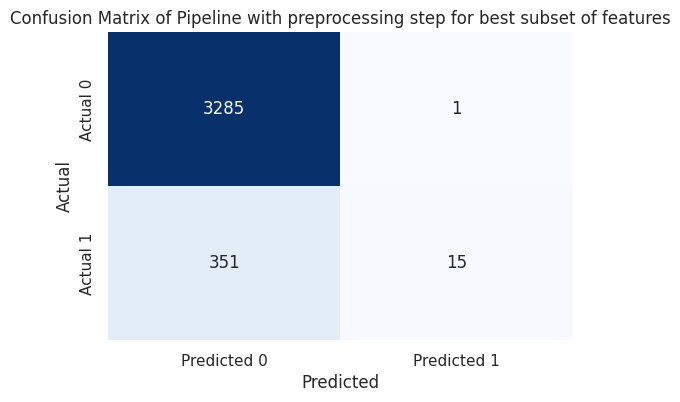

In [44]:
draw_cm(y_test, y_pred_final_pl, 'Pipeline with preprocessing step for best subset of features')

Conslusion: the subset that is deemed to produce the best F1 score is the subset of the top most impactful features on the model's prediction and not within the highly multi-colinearity features subset 

 --- 


### Tuning & Sampling Implementations


> Metric used for assessment of tuning will be ***F1 score***

a. Hyperparam tuning

> for F1 score of the pipeline

In [45]:
param_grid = {
    'classifier__n_estimators': [ 1000, 2000],
    'classifier__max_features': [5, 10, 'sqrt' ],
#     'min_samples_split' : [250, 260], # imbalance target classes should not employ this yet
#     class weight tuning is not available for cuRFClassifier \
#     (we will adress imbalance using data sampling technique instead in order to run the gridsearch more efficiently)
#     'classifier__class_weight': [ 
#                      {0: 1, 1: 8}, # Useful when the cost of misclassifying the minority class is extremely high. 
#                      {0: 1, 1: 2.5}  # High penalty for misclassifying minority class, however is linear
#                     ]  # Adjust for imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator =final_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=2,
    n_jobs=1
)


# with joblib.parallel_backend('threading'):
grid_search.fit(best_X, y_train)

# Evaluate the best model
best_pipeline_hp = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END classifier__max_features=5, classifier__n_estimators=1000; total time=   2.7s
[CV] END classifier__max_features=5, classifier__n_estimators=1000; total time=   2.8s
[CV] END classifier__max_features=5, classifier__n_estimators=1000; total time=   2.6s
[CV] END classifier__max_features=5, classifier__n_estimators=1000; total time=   2.8s
[CV] END classifier__max_features=5, classifier__n_estimators=1000; total time=   2.6s
[CV] END classifier__max_features=5, classifier__n_estimators=2000; total time=   5.7s
[CV] END classifier__max_features=5, classifier__n_estimators=2000; total time=   5.4s
[CV] END classifier__max_features=5, classifier__n_estimators=2000; total time=   5.5s
[CV] END classifier__max_features=5, classifier__n_estimators=2000; total time=   5.1s
[CV] END classifier__max_features=5, classifier__n_estimators=2000; total time=   5.1s
[CV] END classifier__max_features=10, classifier__n_estimators=1000; t

In [46]:
y_pred_hyperparam = grid_search.predict(X_test_best)
precision_pl_hp = precision_score(y_test, y_pred_hyperparam)
recall_pl_hp = recall_score(y_test, y_pred_hyperparam)
f1_pl_hp = f1_score(y_test, y_pred_hyperparam)
print(f"Precision: {precision_pl_hp:.3f}")
print(f"Recall: {recall_pl_hp:.3f}")
print(f"F1 Score: {f1_pl_hp:.3f}")

print(f"Best Parameters: {grid_search.best_params_}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_hyperparam))
pd.DataFrame(grid_search.cv_results_)

Precision: 0.938
Recall: 0.041
F1 Score: 0.079
Best Parameters: {'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000}

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.94      0.04      0.08       366

    accuracy                           0.90      3652
   macro avg       0.92      0.52      0.51      3652
weighted avg       0.91      0.90      0.86      3652



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.557899      0.085634         0.150187        0.006918   
1       4.992627      0.237633         0.372308        0.047931   
2       2.653601      0.093250         0.152442        0.022165   
3       5.217886      0.210415         0.319333        0.048011   
4       2.554087      0.103684         0.143614        0.004423   
5       5.199972      0.167792         0.337569        0.077124   

  param_classifier__max_features param_classifier__n_estimators  \
0                              5                           1000   
1                              5                           2000   
2                             10                           1000   
3                             10                           2000   
4                           sqrt                           1000   
5                           sqrt                           2000   

                                              params  split0_test_score  \
0  {'classifier__max_features': 5, 'classifier__n...           0.046083   
1  {'classifier__max_features': 5, 'classifier__n...           0.055046   
2  {'classifier__max_features': 10, 'classifier__...           0.045662   
3  {'classifier__max_features': 10, 'classifier__...           0.045662   
4  {'classifier__max_features': 'sqrt', 'classifi...           0.054795   
5  {'classifier__max_features': 'sqrt', 'classifi...           0.055046   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.115044           0.072727           0.054795           0.072727   
1           0.115044           0.072727           0.054795           0.072727   
2           0.115044           0.081081           0.063348           0.098655   
3           0.115044           0.081081           0.054545           0.107143   
4           0.115044           0.081448           0.063636           0.098655   
5           0.115044           0.081448           0.063348           0.090090   

   mean_test_score  std_test_score  rank_test_score  
0         0.072275        0.023754                6  
1         0.074068        0.021982                5  
2         0.080758        0.024620                3  
3         0.080695        0.027534                4  
4         0.082716        0.022111                1  
5         0.080995        0.021105                2

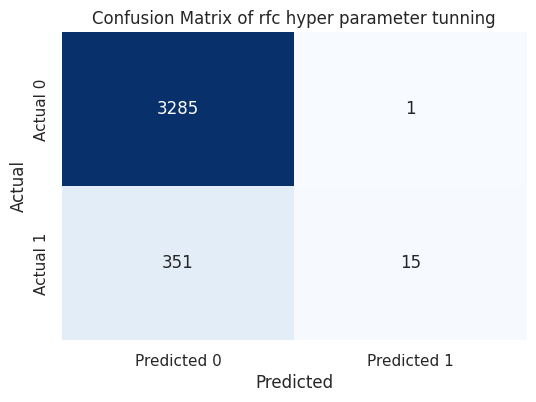

In [47]:
draw_cm(y_test, y_pred_hyperparam, 'rfc hyper parameter tunning')

> Conclusion: Hyperparameter tunning with an imbalance dataset of this magnitude will only amplify the rate of FN (due to the model prioritizing F1 score will equate to more guess of the majority class)

For the purpose of identifying churn customer in this imbalance dataset, I have decide to use a custom scorer of TN(TN+FP+FN) in order to optimize for the highest accuracy of the class of churners, as well as using this metric will make it easier to use hyperparameter tunning alongside other techniques at the sampling- level(oversampling with SMOTE and undersampling ensemble of RFCs)/model-level(threshold tunning to give more weight to the 1 class) without concern of dynamically changing the model's outcome since the hyperparameter is all used to optimize for the highest ratio of churners correctly identified

b. Threshold tunning to optimize for F1 and minimize FN

In [90]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline

class ThresholdTuner(BaseEstimator, ClassifierMixin):
    def __init__(self, pipeline, beta=1.0):
        self.pipeline = pipeline
        self.beta = beta  # Beta parameter for F-beta score
        self.best_threshold_ = 0.5

    def fit(self, X, y):
        # Fit the pipeline
        self.pipeline.fit(X, y)
        return self

    def predict_proba(self, X):
        # Get the probabilities from the final estimator in the pipeline
        return self.pipeline.predict_proba(X)[:, 1]

    def predict(self, X):
        # Use the tuned threshold to make predictions
        probabilities = self.predict_proba(X)
        return (probabilities >= self.best_threshold_).astype(int)

    def tune_threshold(self, X, y):
        # Predict probabilities
        y_scores = self.predict_proba(X)
        
        # Calculate precision-recall curve
        precision, recall, thresholds = precision_recall_curve(y, y_scores)
        
        # Safe versions to avoid division by zero
        epsilon = 1e-10
        precision_safe = precision + epsilon
        recall_safe = recall + epsilon
        
        # Calculate F-beta scores
        f_beta_scores = (1 + self.beta**2) * (precision_safe * recall_safe) / (self.beta**2 * precision_safe + recall_safe)
        print(f"Calculated F-beta scores for beta={self.beta}:", f_beta_scores)

        # Find the best threshold
        best_idx = np.argmax(f_beta_scores)
        self.best_threshold_ = thresholds[best_idx]
        print(f"Best threshold found for beta={self.beta}: {self.best_threshold_}")

        return precision, recall, thresholds, self.best_threshold_
    def fit_tune(self, X_train, y_train, X_val, y_val):
        # Fit the model and tune the threshold
        self.fit(X_train, y_train)
        precision, recall, thresholds, best_threshold = self.tune_threshold(X_val, y_val)
        return precision, recall, thresholds, best_threshold


In [91]:
# Assume `final_pipeline` is your existing pipeline without the threshold tuner
threshold_tuner = ThresholdTuner(pipeline=best_pipeline_hp, beta=1.0)

# Fit and tune on training and validation data
precision_pl_hp_thres, recall_best_pl_hp_thres, thresholds_pl_hp_thres, best_threshold_pl_hp = threshold_tuner.fit_tune(best_X, y_train, X_test_best, y_test)

# After tuning, make predictions on the test set
y_pred_pl_best = threshold_tuner.predict(X_test_best)

# Calculate metrics
precision_pl_hp_best = precision_score(y_test, y_pred_pl_best)
recall_pl_hp_best = recall_score(y_test, y_pred_pl_best)
f1_pl_hp_best = f1_score(y_test, y_pred_pl_best)

print(f"Pipeline with hyperparamter and threshold tuning - Precision: {precision_pl_hp_best:.2f}, Recall: {recall_pl_hp_best:.2f}, F1 Score: {f1_pl_hp_best:.2f}")
print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_pred_pl_best))

Calculated F-beta scores for beta=1.0: [1.82180189e-01 1.82225542e-01 1.82270917e-01 ... 1.08695654e-02
 5.44959148e-03 2.00000000e-10]
Best threshold found for beta=1.0: 0.19774070382118225
Pipeline with hyperparamter and threshold tuning - Precision: 0.28, Recall: 0.35, F1 Score: 0.31

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3286
           1       0.28      0.35      0.31       366

    accuracy                           0.85      3652
   macro avg       0.60      0.63      0.61      3652
weighted avg       0.86      0.85      0.85      3652



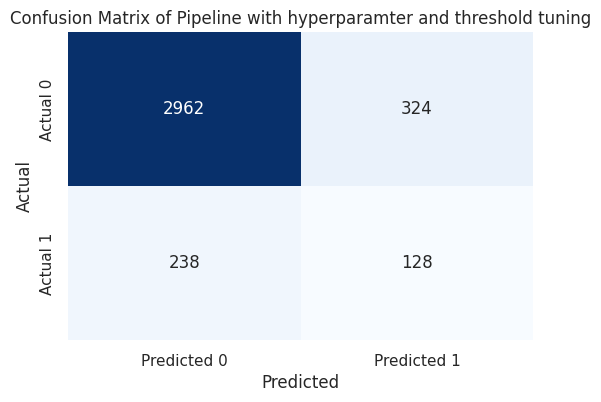

In [92]:
draw_cm(y_test, y_pred_pl_best, 'Pipeline with hyperparamter and threshold tuning')

c. Pipeline using SMOTE with threshold tuning

In [72]:
# from cuml.ensemble import RandomForestClassifier as cuRFClassifier
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import QuantileTransformer, RobustScaler
# import numpy as np


def evaluate_subset_smote(X_subset, y, preprocessor):
    # Get the column names from X_subset
    subset_columns = X_subset.columns.tolist()
    
    # Modify the preprocessor to only use columns that are present in X_subset
    new_preprocessor = ColumnTransformer(
        transformers=[
#             ('quantile', QuantileTransformer(output_distribution='normal'), 
#              [col for col in quantile_scale_ft if col in subset_columns]),
            ('robust', RobustScaler(), 
             [col for col in robust_scale_num_ft if col in subset_columns])
        ],
        remainder='passthrough'
    )
    
    pipeline_smote = ImbPipeline([
    
    ('smote', SMOTE(random_state=42)),
    ('preprocessor', new_preprocessor),
    ('classifier', cuRFClassifier(n_streams=1 , n_estimators=1000, random_state=42))
])
    
    scores = cross_val_score(pipeline_smote, X_subset, y, cv=5, scoring='f1')
    return np.mean(scores)


ss_smote_results = {
    'full': evaluate_subset_smote(X_train, y_train, preprocessor),
    'subset1': evaluate_subset_smote(subset1, y_train, preprocessor),
    'subset2': evaluate_subset_smote(subset2, y_train, preprocessor),
    'subset3': evaluate_subset_smote(subset3, y_train, preprocessor),
    'subset4': evaluate_subset_smote(subset4, y_train, preprocessor)
}

In [73]:
ss_smote_results

{'full': 0.16355042275081777,
 'subset1': 0.12730825903647636,
 'subset2': 0.1739124066512847,
 'subset3': 0.17106305261268348,
 'subset4': 0.1659469884095413}

In [74]:
# Create a pipeline with SMOTE and Random Forest
best_subset_smote =max(ss_smote_results, key=ss_smote_results.get)
best_X_smote = eval(best_subset_smote)  # df corresponding to the best subset
best_columns_smote  = best_X_smote.columns.tolist() 
pipeline_smote = ImbPipeline([
    
    ('smote', SMOTE(random_state=42)),
    ('preprocessor', best_preprocessor),
    ('classifier', cuRFClassifier(n_streams=1 , n_estimators=1000, random_state=42))
])
pipeline_smote.fit(best_X_smote, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['cons_gas_12m',
                                                   'forecast_cons_12m',
                                                   'forecast_discount_energy',
                                                   'forecast_price_pow_off_peak',
                                                   'margin_gross_pow_ele',
                                                   'margin_net_pow_ele',
                                                   'nb_prod_act', 'net_margin',
                                                   'pow_max',
                                                   'var_year_price_off_peak_var',...
                                                   'var_year_price_mid_peak',
                                                   'var_6m_price_off_peak_var',
                                                   'var_6m_price_mid_peak_var',
                                                   'var_6m_price_peak_fix',
                                                   'var_6m_price_mid_peak_fix',
                                                   'var_6m_price_off_peak',
                                                   'var_6m_price_peak',
                                                   'var_6m_price_mid_peak',
                                                   'offpeak_diff_dec_january_energy',
                                                   'offpeak_diff_dec_january_power',
                                                   'peak_mid_peak_var_mean_diff',
                                                   'tenure',
                                                   'months_activ'])])),
                ('classifier', RandomForestClassifier())])

In [75]:
# Fit the pipeline
smote_step = pipeline_smote.named_steps['smote']

# Step 2: Use fit_resample to get the resampled data
X_resampled, y_resampled = smote_step.fit_resample(best_X_smote, y_train)
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({1.0: 9901, 0.0: 9901})


In [77]:
X_test_best_smote = X_test[best_columns_smote]
y_smote_plain = pipeline_smote.predict(X_test_best_smote)

In [78]:
precision_smote = precision_score(y_test, y_smote_plain)
recall_smote = recall_score(y_test, y_smote_plain)
f1_smote = f1_score(y_test, y_smote_plain)

print(f"Pipepline using SMOTE - Precision: {precision_smote:.2f}, Recall: {recall_smote:.2f}, F1 Score: {f1_smote:.2f}")
print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_smote_plain))

Pipepline using SMOTE - Precision: 0.51, Recall: 0.13, F1 Score: 0.21

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3286
           1       0.51      0.13      0.21       366

    accuracy                           0.90      3652
   macro avg       0.71      0.56      0.58      3652
weighted avg       0.87      0.90      0.87      3652



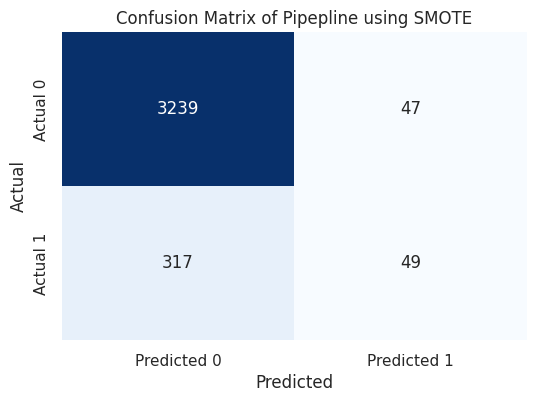

In [79]:
draw_cm(y_test, y_smote_plain, 'Pipepline using SMOTE')

___
> we can try further improving the SMOTE pipeline with tunning the hyperparameter to optimize for true positive rate 


In [80]:
param_grid_smote = {
    'classifier__n_estimators': [ 1000],
    'classifier__min_samples_leaf': [ 30, 50], # too big for class size before smote
    'classifier__bootstrap': [True],
    'classifier__split_criterion':[0, 1],
    'classifier__max_features': ['log2','sqrt'],

#     'classifier__class_weight': [ 
#                      {0: 1, 1: 1}, # Useful when the cost of misclassifying the minority class is high 
#                      {0: 1, 1:6}  # smote already balanced out the classes
#                     ]  # Adjust for F1 optimization
}

grid_search_smote = GridSearchCV(
    estimator=pipeline_smote,
    param_grid=param_grid_smote,
    scoring='f1',
    cv=4,
    verbose=2,
    n_jobs=1,
    error_score='raise'
)

grid_search_smote.fit(best_X_smote, y_train)

best_smote_pl_hp = grid_search_smote.best_estimator_

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END classifier__bootstrap=True, classifier__max_features=log2, classifier__min_samples_leaf=30, classifier__n_estimators=1000, classifier__split_criterion=0; total time=   2.7s
[CV] END classifier__bootstrap=True, classifier__max_features=log2, classifier__min_samples_leaf=30, classifier__n_estimators=1000, classifier__split_criterion=0; total time=   2.6s
[CV] END classifier__bootstrap=True, classifier__max_features=log2, classifier__min_samples_leaf=30, classifier__n_estimators=1000, classifier__split_criterion=0; total time=   2.6s
[CV] END classifier__bootstrap=True, classifier__max_features=log2, classifier__min_samples_leaf=30, classifier__n_estimators=1000, classifier__split_criterion=0; total time=   2.6s
[CV] END classifier__bootstrap=True, classifier__max_features=log2, classifier__min_samples_leaf=30, classifier__n_estimators=1000, classifier__split_criterion=1; total time=   2.6s
[CV] END classifier__bootstrap

In [81]:
y_pred_smote_hyperparam = best_smote_pl_hp.predict(X_test_best_smote)

In [82]:
print(f"Best Parameters: {grid_search_smote.best_params_}")
precision_smote_hp = precision_score(y_test, y_pred_smote_hyperparam)
recall_smote_hp = recall_score(y_test, y_pred_smote_hyperparam)
f1_smote_hp = f1_score(y_test, y_pred_smote_hyperparam)

print(f"SMOTE with Threshold Tuning - Precision: {precision_smote_hp:.2f}, Recall: {recall_smote_hp:.2f}, F1 Score: {f1_smote_hp:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_smote_hyperparam))
pd.DataFrame(grid_search_smote.cv_results_)

Best Parameters: {'classifier__bootstrap': True, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 50, 'classifier__n_estimators': 1000, 'classifier__split_criterion': 0}
SMOTE with Threshold Tuning - Precision: 0.24, Recall: 0.17, F1 Score: 0.20

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3286
           1       0.24      0.17      0.20       366

    accuracy                           0.86      3652
   macro avg       0.57      0.56      0.56      3652
weighted avg       0.84      0.86      0.85      3652



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.537980      0.045170         0.073642        0.000873   
1       2.528448      0.009422         0.073126        0.002995   
2       2.553619      0.145250         0.079625        0.048163   
3       2.484260      0.010602         0.051807        0.000915   
4       2.579694      0.010713         0.071350        0.001734   
5       2.600902      0.021064         0.071937        0.003438   
6       2.525053      0.015752         0.050557        0.000399   
7       2.548073      0.016609         0.052177        0.003100   

  param_classifier__bootstrap param_classifier__max_features  \
0                        True                           log2   
1                        True                           log2   
2                        True                           log2   
3                        True                           log2   
4                        True                           sqrt   
5                        True                           sqrt   
6                        True                           sqrt   
7                        True                           sqrt   

  param_classifier__min_samples_leaf param_classifier__n_estimators  \
0                                 30                           1000   
1                                 30                           1000   
2                                 50                           1000   
3                                 50                           1000   
4                                 30                           1000   
5                                 30                           1000   
6                                 50                           1000   
7                                 50                           1000   

  param_classifier__split_criterion  \
0                                 0   
1                                 1   
2                                 0   
3                                 1   
4                                 0   
5                                 1   
6                                 0   
7                                 1   

                                              params  split0_test_score  \
0  {'classifier__bootstrap': True, 'classifier__m...           0.200000   
1  {'classifier__bootstrap': True, 'classifier__m...           0.207407   
2  {'classifier__bootstrap': True, 'classifier__m...           0.223195   
3  {'classifier__bootstrap': True, 'classifier__m...           0.202247   
4  {'classifier__bootstrap': True, 'classifier__m...           0.203046   
5  {'classifier__bootstrap': True, 'classifier__m...           0.197970   
6  {'classifier__bootstrap': True, 'classifier__m...           0.188235   
7  {'classifier__bootstrap': True, 'classifier__m...           0.188406   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.241546           0.158163           0.190736         0.197611   
1           0.231527           0.146214           0.185792         0.192735   
2           0.238739           0.149883           0.206030         0.204462   
3           0.232877           0.157895           0.208651         0.200418   
4           0.223881           0.139535           0.193182         0.189911   
5           0.221080           0.137203           0.177650         0.183476   
6           0.225882           0.146341           0.205263         0.191431   
7           0.234450           0.129353           0.193029         0.186310   

   std_test_score  rank_test_score  
0        0.029746                3  
1        0.031355                4  
2        0.033568                1  
3        0.027078                2  
4        0.031124                6  
5        0.030819                8  
6        0.029247                5  
7        0.037453                7

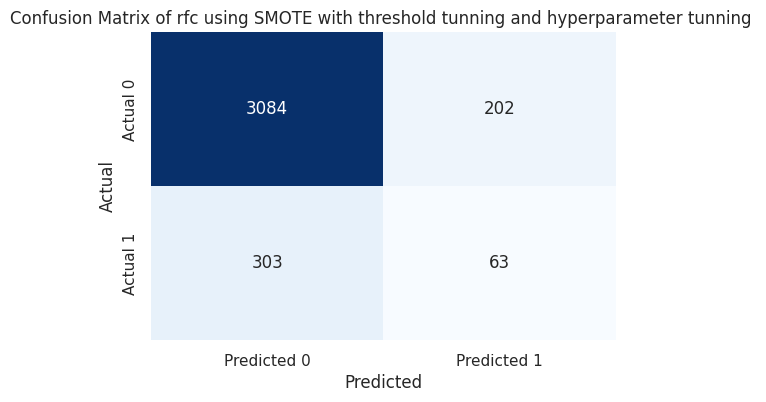

In [83]:
draw_cm(y_test, y_pred_smote_hyperparam, 'rfc using SMOTE with threshold tunning and hyperparameter tunning ')

c2. SMOTE with threshold tuning and hyperparameter tuning 

In [60]:
# threshold_tuner_smote = ThresholdTuner(pipeline=best_smote_pl_hp, beta=1.5)

In [94]:
# Example usage with different beta values
threshold_tuner_1 = ThresholdTuner(pipeline=best_smote_pl_hp, beta=0.5)
pr_sm_0_5, rc_sm_05, threshlds_sm_05, best_threshold_05_sm =threshold_tuner_1.fit_tune(X_resampled, y_resampled, X_test_best, y_test)

threshold_tuner_1_2 = ThresholdTuner(pipeline=best_smote_pl_hp, beta=0.75)
pr_sm_0_75, rc_sm_075, threshlds_sm_075, best_threshold_075_sm = threshold_tuner_1_2.fit_tune(X_resampled, y_resampled, X_test_best, y_test)

threshold_tuner_2 = ThresholdTuner(pipeline=best_smote_pl_hp, beta=1.0)
pr_sm_1, rc_sm_1, threshlds_sm_1, best_threshold_1_sm =threshold_tuner_2.fit_tune(X_resampled, y_resampled,X_test_best, y_test)

threshold_tuner_3 = ThresholdTuner(pipeline=best_smote_pl_hp, beta=2.0)
pr_sm_2, rc_sm_2, threshlds_sm_2, best_threshold_2_sm =  threshold_tuner_3.fit_tune(X_resampled, y_resampled,X_test_best, y_test)

Calculated F-beta scores for beta=0.5: [1.22211834e-01 1.22244489e-01 1.22277162e-01 ... 2.67379684e-02
 1.35135140e-02 5.00000000e-10]
Best threshold found for beta=0.5: 0.5630610585212708
Calculated F-beta scores for beta=0.75: [1.48235752e-01 1.48274186e-01 1.48312640e-01 ... 1.50330730e-02
 7.55287037e-03 2.77777778e-10]
Best threshold found for beta=0.75: 0.4486626088619232
Calculated F-beta scores for beta=1.0: [1.82180189e-01 1.82225542e-01 1.82270917e-01 ... 1.08695654e-02
 5.44959148e-03 2.00000000e-10]
Best threshold found for beta=1.0: 0.4002332091331482
Calculated F-beta scores for beta=2.0: [3.57701329e-01 3.57771261e-01 3.57841220e-01 ... 6.82128253e-03
 3.41296941e-03 1.25000000e-10]
Best threshold found for beta=2.0: 0.2036523073911667


In [97]:
# threshold_tuner_smote.fit_tune(X_resampled, y_resampled, X_test_best, y_test)

# Make predictions with the tuned threshold
y_pred_smote_hp_tuned = threshold_tuner_2.predict(X_test_best)

# Calculate and print performance metrics
precision_best_smote_hp_tuned = precision_score(y_test, y_pred_smote_hp_tuned)
recall_best_smote_hp_tuned = recall_score(y_test, y_pred_smote_hp_tuned)
f1_best_smote_hp_tuned = f1_score(y_test, y_pred_smote_hp_tuned)

print(f"Tuned Pipeline - Precision: {precision_best_smote_hp_tuned:.2f}, "
      f"Recall: {recall_best_smote_hp_tuned:.2f}, F1 Score: {f1_best_smote_hp_tuned:.2f}")

print("\nClassification Report (Best Threshold):\n")
print(classification_report(y_test, y_pred_smote_hp_tuned))

Tuned Pipeline - Precision: 0.18, Recall: 0.36, F1 Score: 0.24

Classification Report (Best Threshold):

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3286
           1       0.18      0.36      0.24       366

    accuracy                           0.77      3652
   macro avg       0.55      0.59      0.56      3652
weighted avg       0.85      0.77      0.80      3652



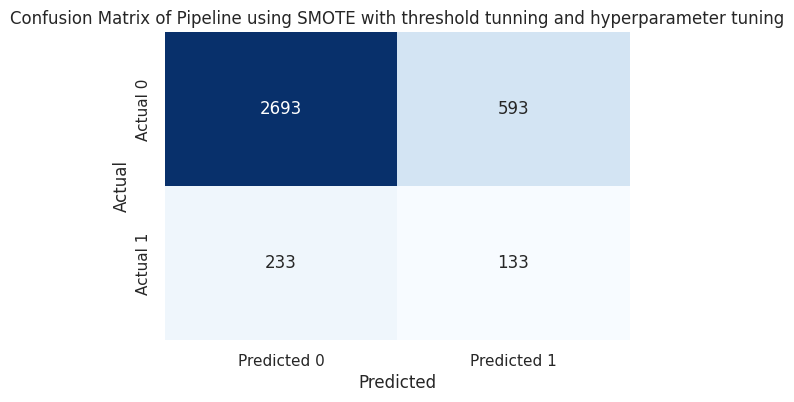

In [98]:
draw_cm(y_test, y_pred_smote_hp_tuned, 'Pipeline using SMOTE with threshold tunning and hyperparameter tuning')

## RESULT from all the models:

Traditional RFC with no subsetting, hyperparameter tunning nor threshold tunning -Precision: 0.850, Recall: 0.046, F1 Score: 0.088

Pipepline with Robust scalling step & without subsetting, hyperparameter tunning nor threshold tunning - Precision: 0.826, Recall: 0.052, F1 Score: 0.098

Pipepline with Robust scalling step and subsetting & with out hyperparameter tunning nor threshold tunning - Precision: 0.708, Recall: 0.046, F1 score: 0.087 

***Pipeline with Robust scalling step and subsetting & hyperparamter and threshold tuning - Precision: 0.28, Recall: 0.35, F1 Score: 0.31***


Pipepline using SMOTE on and subset with Robust scalling step &  hyperparamter , without threshold tuning - Precision: 0.24, Recall: 0.17, F1 Score: 0.20

Pipepline using SMOTE on and subset with Robust scalling step and hyperparamter tuning & without threshold tuning - SMOTE with Threshold Tuning - Precision: 0.18, Recall: 0.36, F1 Score: 0.24



> The model of my recomendation is the Pipepline Pipeline with Robust scalling step and subsetting & hyperparamter and threshold tuning, due to its overall balance in the recall and precision trade off


In [89]:
import pickle

# Define file paths
model_file = 'pipeline_smote_model.pkl'
X_test_file = 'X_test_best.pkl'
y_pred_file = 'y_pred_smote_best.pkl'
y_test_file = 'y_test.pkl'

# Save the trained pipeline model
with open(model_file, 'wb') as f:
    pickle.dump(pipeline_smote, f)

# Save X_test_best
with open(X_test_file, 'wb') as f:
    pickle.dump(X_test_best, f)

# Save y_pred_smote_best
with open(y_pred_file, 'wb') as f:
    pickle.dump(y_pred_pl_best, f)

# Save y_test
with open(y_test_file, 'wb') as f:
    pickle.dump(y_test, f)

Defining method to plot Precision Recall curve 

In [100]:
def prec_recl_crv_threshold(thresholds,precision_model_thres, recall_model_thres, best_threshold_model , model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision_model_thres[:-1], label="Precision")
    plt.plot(thresholds, recall_model_thres[:-1], label="Recall")
    plt.axvline(x=best_threshold_model, color='r', linestyle='--', label="Best Threshold")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/Recall")
    plt.title(f"Precision-Recall Curve of {model_name}")
    plt.legend()
    plt.show()

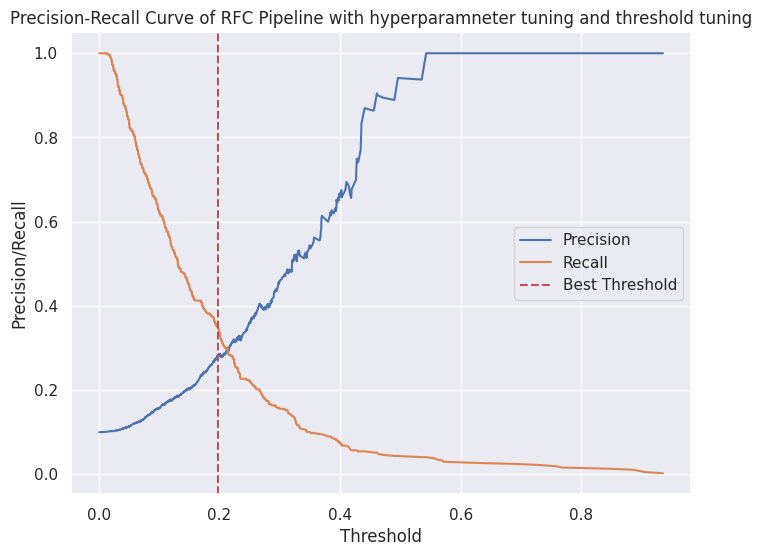

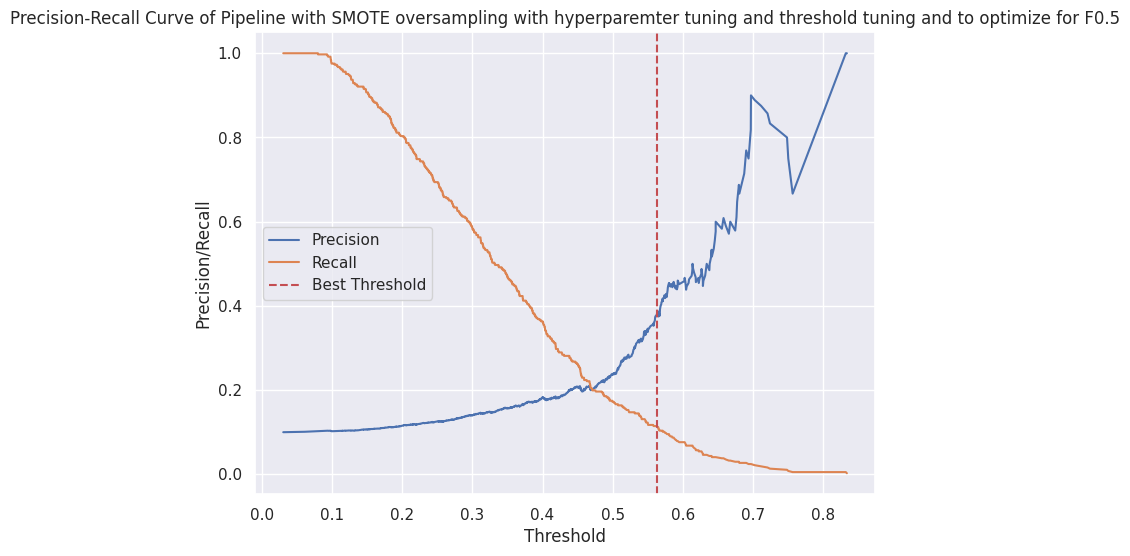

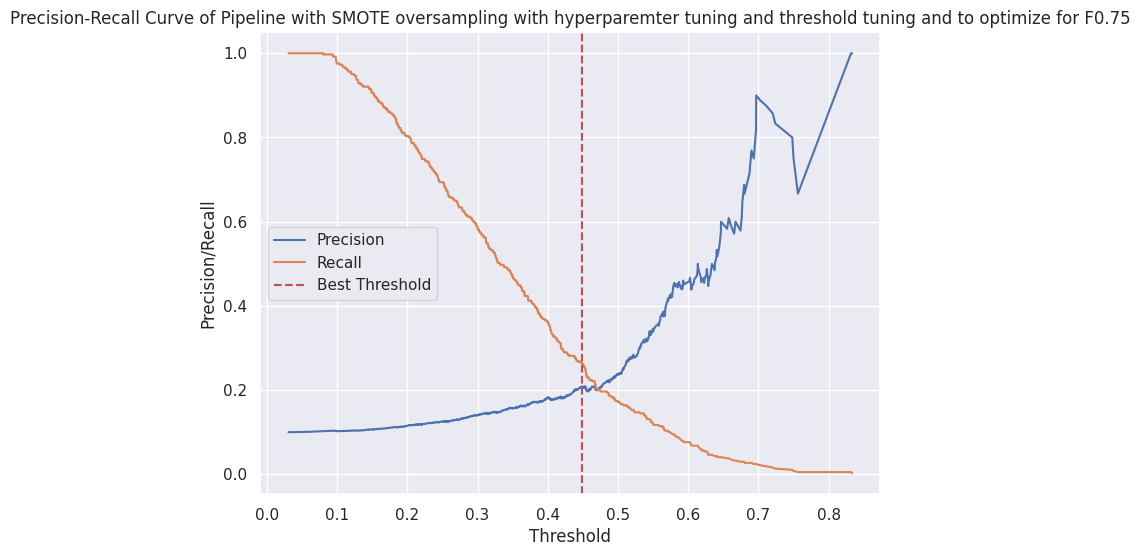

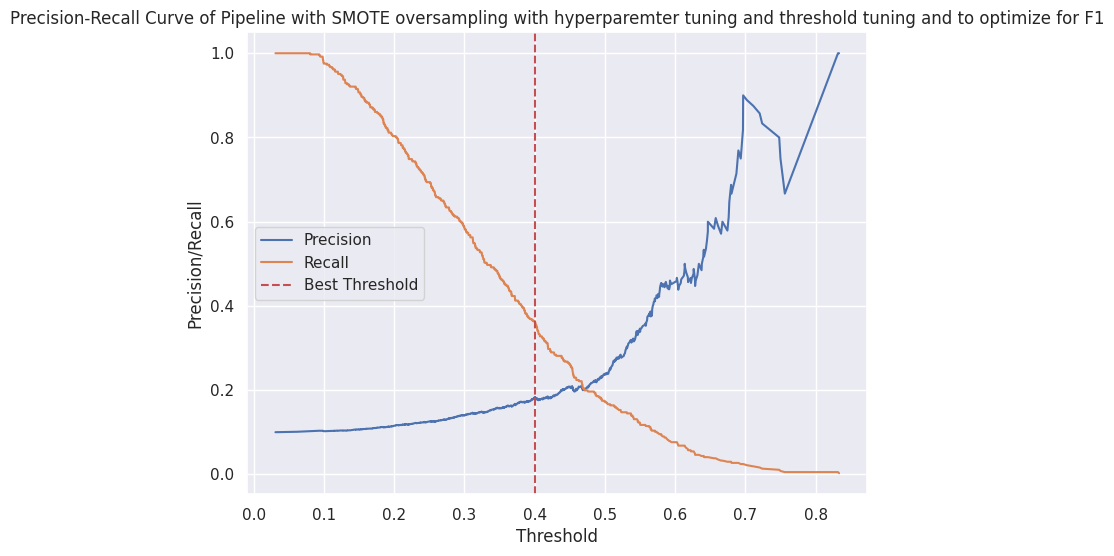

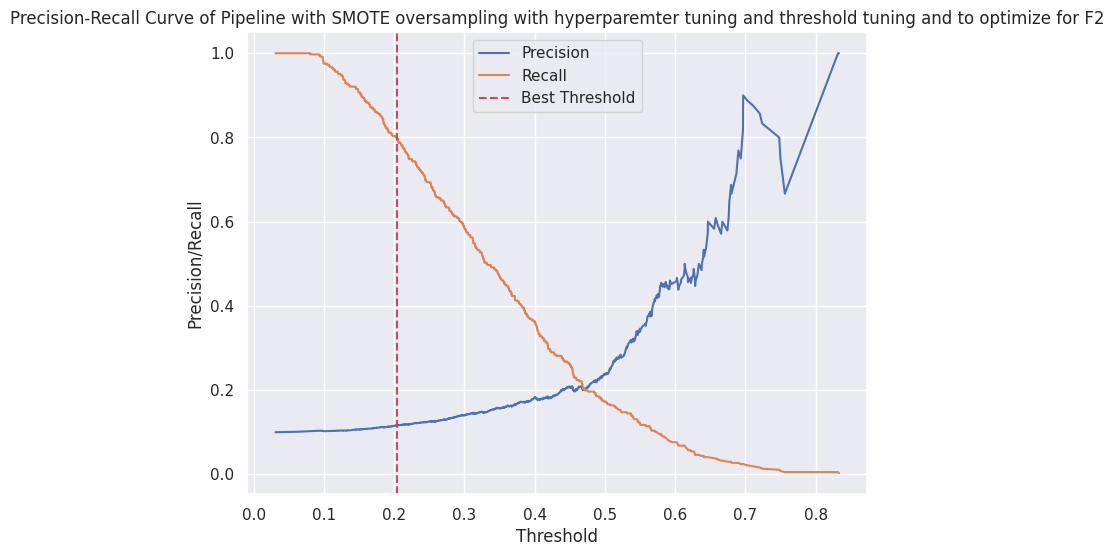

In [103]:
prec_recl_crv_threshold(thresholds_pl_hp_thres,precision_pl_hp_thres, recall_best_pl_hp_thres, best_threshold_pl_hp , 'RFC Pipeline with hyperparamneter tuning and threshold tuning')
prec_recl_crv_threshold(threshlds_sm_05, pr_sm_0_5, rc_sm_05, best_threshold_05_sm, 'Pipeline with SMOTE oversampling with hyperparemter tuning and threshold tuning and to optimize for F0.5')
prec_recl_crv_threshold(threshlds_sm_075, pr_sm_0_75, rc_sm_075, best_threshold_075_sm, 'Pipeline with SMOTE oversampling with hyperparemter tuning and threshold tuning and to optimize for F0.75')
prec_recl_crv_threshold(threshlds_sm_1, pr_sm_1, rc_sm_1, best_threshold_1_sm, 'Pipeline with SMOTE oversampling with hyperparemter tuning and threshold tuning and to optimize for F1')
prec_recl_crv_threshold(threshlds_sm_2, pr_sm_2, rc_sm_2, best_threshold_2_sm, 'Pipeline with SMOTE oversampling with hyperparemter tuning and threshold tuning and to optimize for F2')

